Dropped state abbreviations with no match: []
Correlation Matrix:
                                             Total Performance Rate  \
Total Performance Rate                                     1.000000   
Pharmacist Employment                                      0.121614   
Registered Nurse Employment                                0.128484   
Respiratory Therapist Employment                           0.115147   
Physician Assistant Employment                             0.114454   
Internal Medicine Medical Doctor Employment                0.112944   
Family Medicine Medical Doctor Employment                  0.112944   
Emergency Room Medical Doctor Employment                   0.077167   

                                             Pharmacist Employment  \
Total Performance Rate                                    0.121614   
Pharmacist Employment                                     1.000000   
Registered Nurse Employment                               0.994408   
Respiratory Th

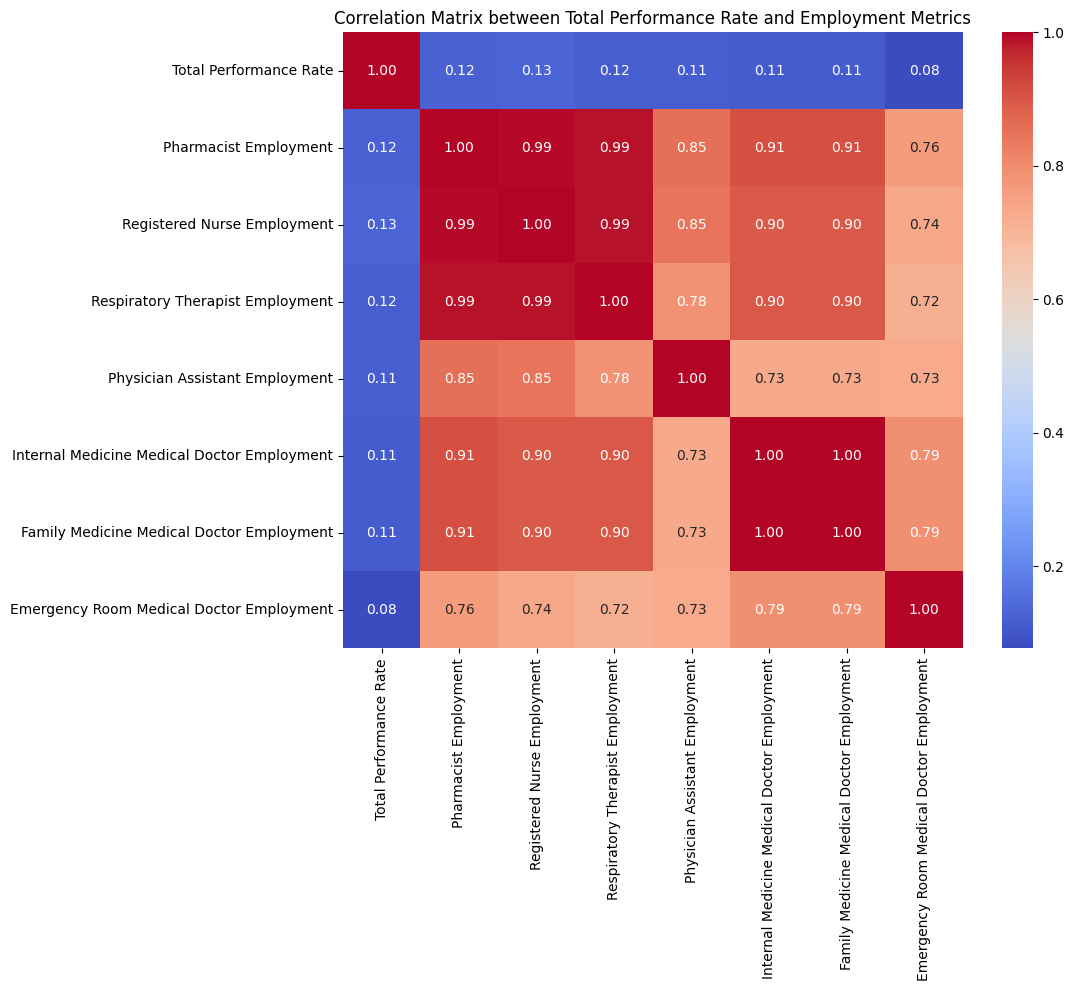

In [7]:
#Correlation Matrix


import geopandas as gpd
import pandas as pd
import folium
import us
import seaborn as sns
import matplotlib.pyplot as plt

# File paths
state_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/tl_2024_us_state.shp'
population_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/2024_POP.csv'
ranking = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/hospitals_current_data/hvbp_clinical_outcomes.csv'

# Labor board statistics by role
roles = {
    'Pharmacist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Pharm.csv',
    'Registered Nurse': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RN.csv',
    'Respiratory Therapist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RT.csv',
    'Physician Assistant': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Physcian Assistant.csv',
    'Internal Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Internal.csv',
    'Family Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Family Med Doctors.csv',
    'Emergency Room Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report ER DOC.csv'
}

# Load state shapefile using GeoPandas
gdf = gpd.read_file(state_data)

# Load population data
population_df = pd.read_csv(population_data)
population_df['State'] = population_df['State'].str.strip()
population_df['2024'] = pd.to_numeric(population_df['2024'], errors='coerce')
gdf = gdf.rename(columns={'NAME': 'State'})

# Merge population data with state data
merged_gdf = gdf.merge(population_df, on='State', how='left')

# Process CMS patient rankings
ranking_df = pd.read_csv(ranking)

# Map state abbreviations to full state names and log dropped states
dropped_states = []
def map_state(abbreviation):
    if abbreviation == "DC":
        return "District of Columbia"
    state = us.states.lookup(abbreviation)
    if not state:
        dropped_states.append(abbreviation)
        return None
    return state.name

ranking_df['State'] = ranking_df['State'].map(map_state)
ranking_df = ranking_df.dropna(subset=['State'])
print("Dropped state abbreviations with no match:", dropped_states)

# Select relevant columns and compute total performance rate
ranking_df = ranking_df[['State',
                         'MORT-30-AMI Performance Rate',
                         'MORT-30-HF Performance Rate',
                         'MORT-30-COPD Performance Rate',
                         'MORT-30-CABG Performance Rate']].dropna()
for col in ['MORT-30-AMI Performance Rate',
            'MORT-30-HF Performance Rate',
            'MORT-30-COPD Performance Rate',
            'MORT-30-CABG Performance Rate']:
    ranking_df[col] = pd.to_numeric(ranking_df[col], errors='coerce')

ranking_df['Total Performance Rate'] = ranking_df[
    ['MORT-30-AMI Performance Rate',
     'MORT-30-HF Performance Rate',
     'MORT-30-COPD Performance Rate',
     'MORT-30-CABG Performance Rate']
].mean(axis=1)

# Merge CMS performance data with GeoDataFrame
merged_gdf = merged_gdf.merge(ranking_df, on='State', how='left')

# Process labor statistics and add to GeoDataFrame
for role, path in roles.items():
    role_df = pd.read_csv(path)
    role_df['Area Name'] = role_df['Area Name'].str.split('(').str[0].str.strip()
    role_df['Employment'] = pd.to_numeric(role_df['Employment'], errors='coerce')
    role_summary = role_df.groupby('Area Name')['Employment'].sum().reset_index()
    role_summary = role_summary.rename(columns={'Area Name': 'State', 'Employment': f'{role} Employment'})
    merged_gdf = merged_gdf.merge(role_summary, on='State', how='left')

# Calculate correlation matrix
correlation_columns = ['Total Performance Rate'] + [f'{role} Employment' for role in roles.keys()]
correlation_data = merged_gdf[correlation_columns].dropna()
correlation_matrix = correlation_data.corr()

print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix between Total Performance Rate and Employment Metrics")
plt.show()


Dropped state abbreviations with no match: []
Correlation Matrix for MORT-30-AMI Performance Rate:
                                             MORT-30-AMI Performance Rate  \
MORT-30-AMI Performance Rate                                     1.000000   
Pharmacist Employment                                            0.060152   
Registered Nurse Employment                                      0.067870   
Respiratory Therapist Employment                                 0.046690   
Physician Assistant Employment                                   0.086705   
Internal Medicine Medical Doctor Employment                      0.061246   
Family Medicine Medical Doctor Employment                        0.061246   
Emergency Room Medical Doctor Employment                         0.087573   

                                             Pharmacist Employment  \
MORT-30-AMI Performance Rate                              0.060152   
Pharmacist Employment                                     1.000000 

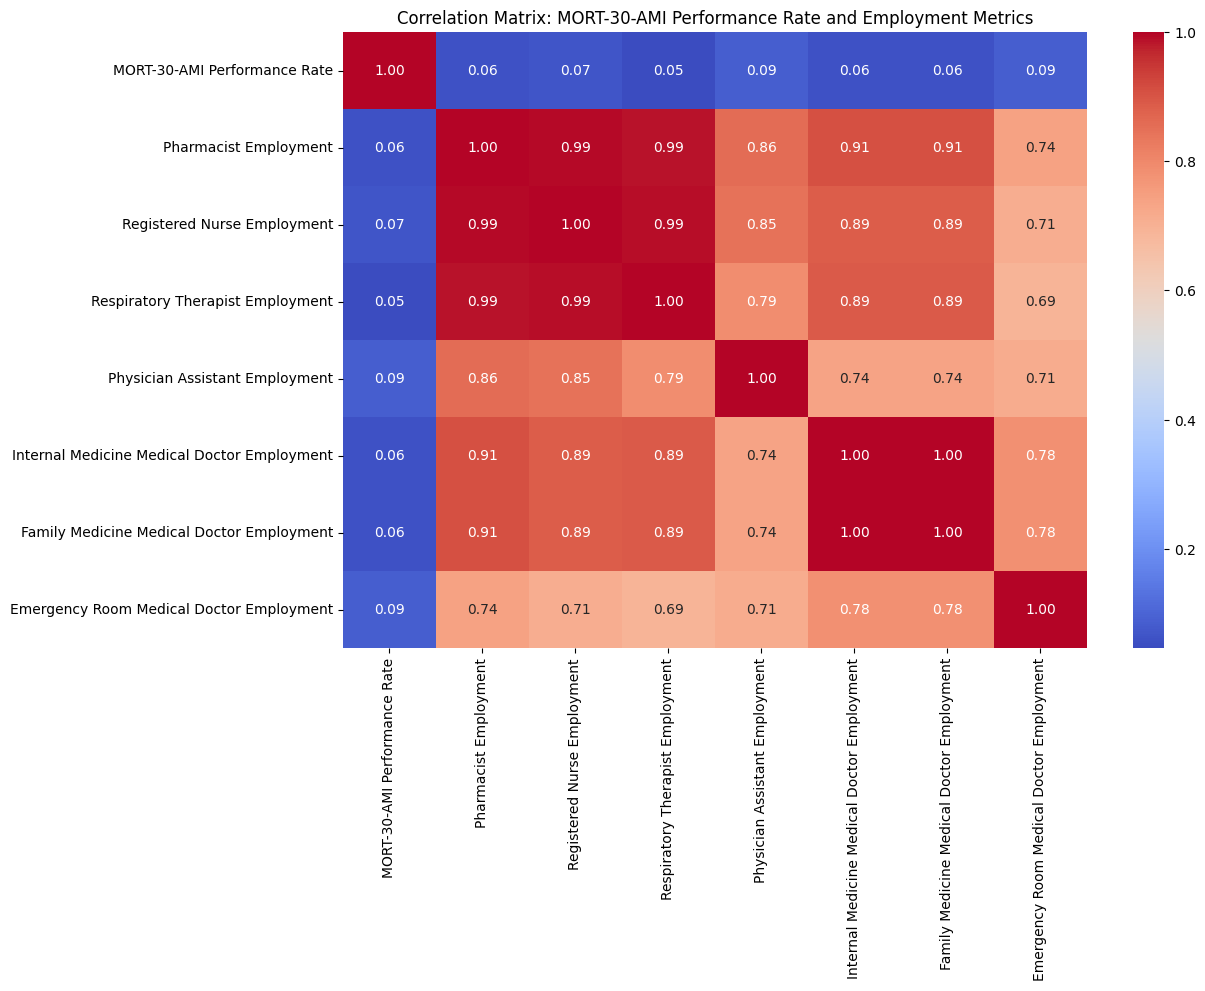

Correlation Matrix for MORT-30-HF Performance Rate:
                                             MORT-30-HF Performance Rate  \
MORT-30-HF Performance Rate                                     1.000000   
Pharmacist Employment                                           0.188504   
Registered Nurse Employment                                     0.194993   
Respiratory Therapist Employment                                0.173359   
Physician Assistant Employment                                  0.189337   
Internal Medicine Medical Doctor Employment                     0.182489   
Family Medicine Medical Doctor Employment                       0.182489   
Emergency Room Medical Doctor Employment                        0.148084   

                                             Pharmacist Employment  \
MORT-30-HF Performance Rate                               0.188504   
Pharmacist Employment                                     1.000000   
Registered Nurse Employment                          

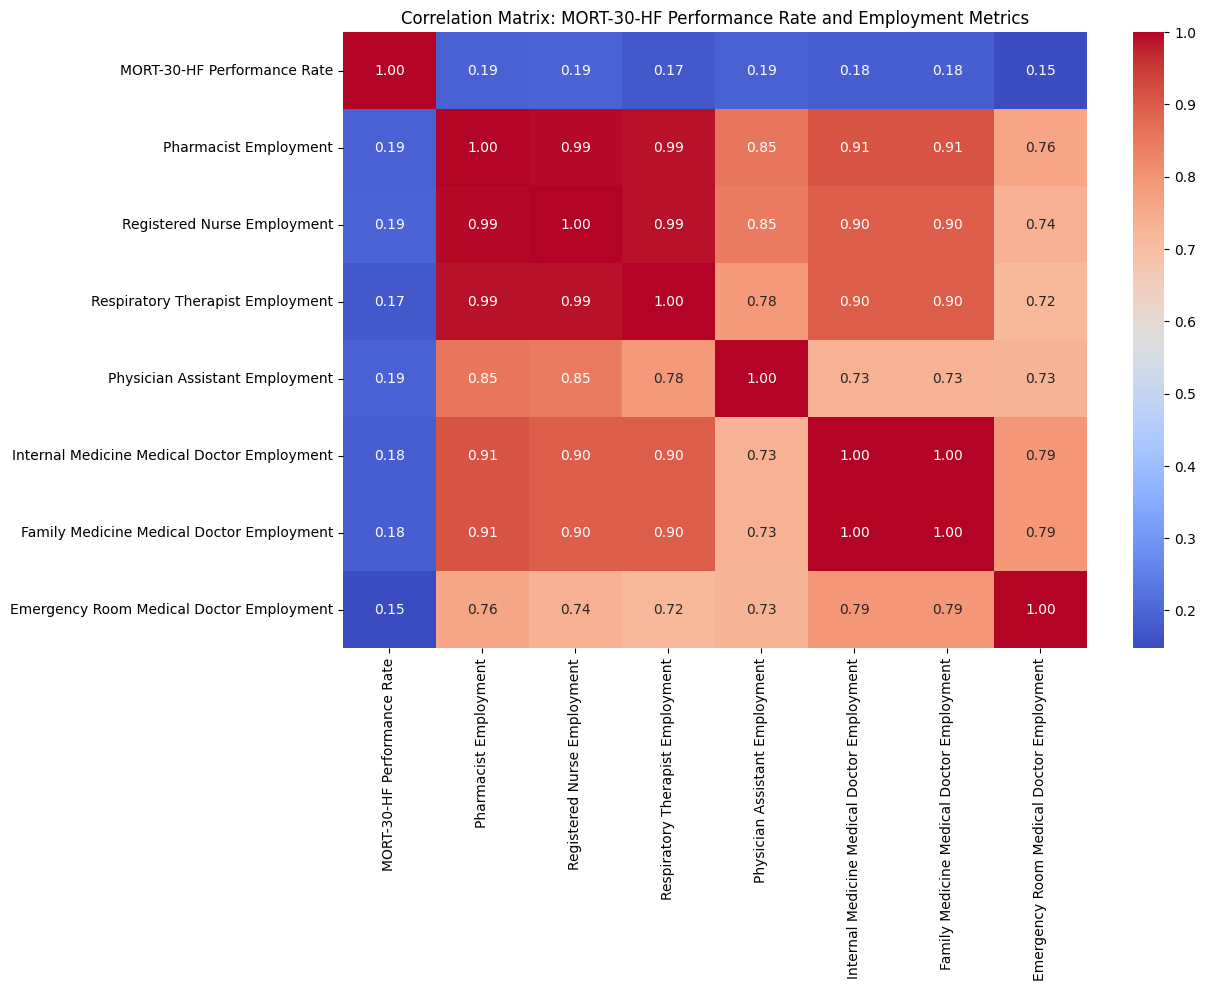

Correlation Matrix for MORT-30-COPD Performance Rate:
                                             MORT-30-COPD Performance Rate  \
MORT-30-COPD Performance Rate                                     1.000000   
Pharmacist Employment                                             0.097768   
Registered Nurse Employment                                       0.102331   
Respiratory Therapist Employment                                  0.081102   
Physician Assistant Employment                                    0.111153   
Internal Medicine Medical Doctor Employment                       0.093375   
Family Medicine Medical Doctor Employment                         0.093375   
Emergency Room Medical Doctor Employment                          0.084787   

                                             Pharmacist Employment  \
MORT-30-COPD Performance Rate                             0.097768   
Pharmacist Employment                                     1.000000   
Registered Nurse Employment      

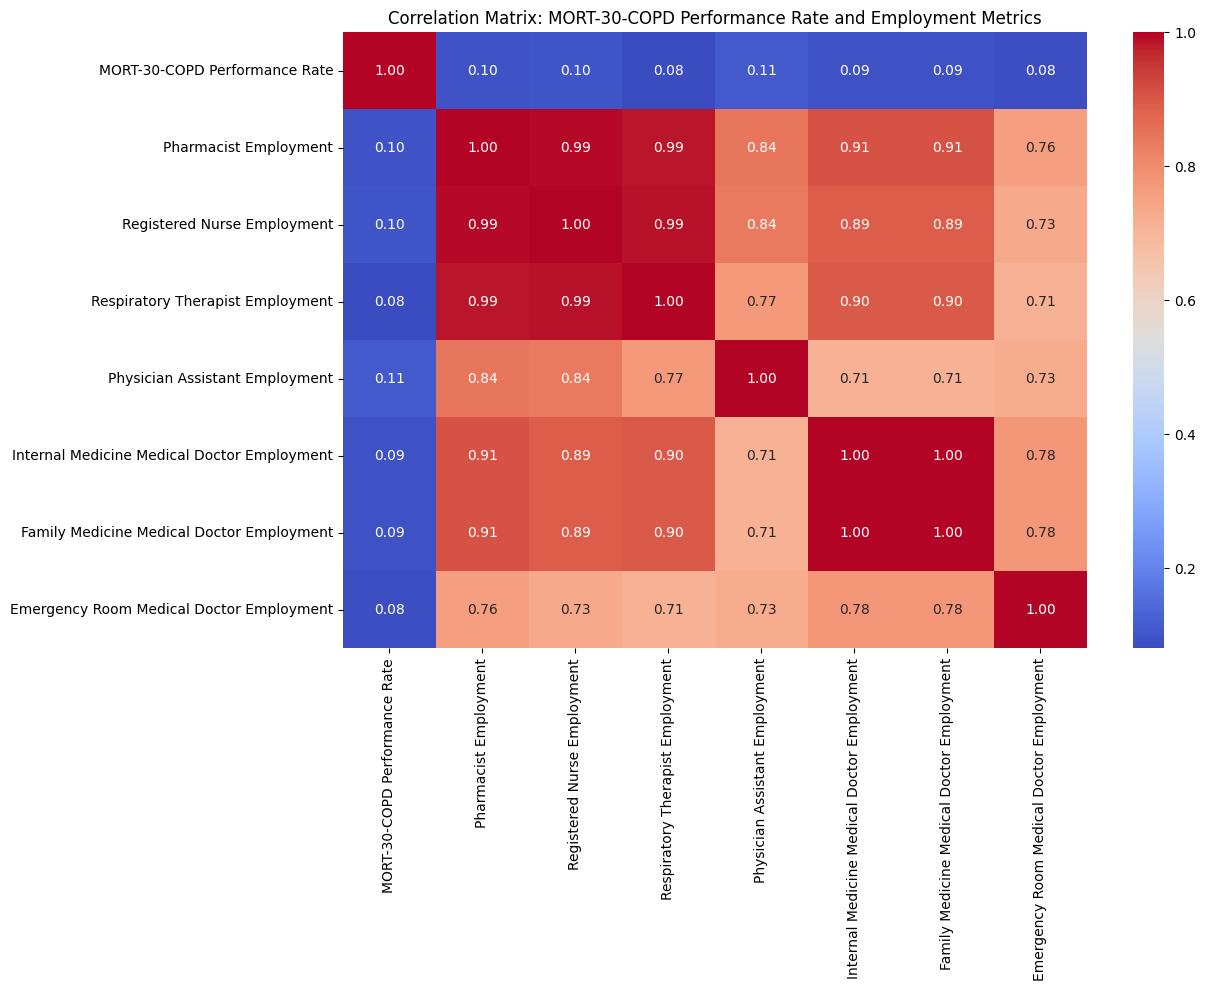

Correlation Matrix for MORT-30-CABG Performance Rate:
                                             MORT-30-CABG Performance Rate  \
MORT-30-CABG Performance Rate                                     1.000000   
Pharmacist Employment                                             0.024931   
Registered Nurse Employment                                       0.017754   
Respiratory Therapist Employment                                 -0.006202   
Physician Assistant Employment                                    0.096001   
Internal Medicine Medical Doctor Employment                       0.028908   
Family Medicine Medical Doctor Employment                         0.028908   
Emergency Room Medical Doctor Employment                          0.089748   

                                             Pharmacist Employment  \
MORT-30-CABG Performance Rate                             0.024931   
Pharmacist Employment                                     1.000000   
Registered Nurse Employment      

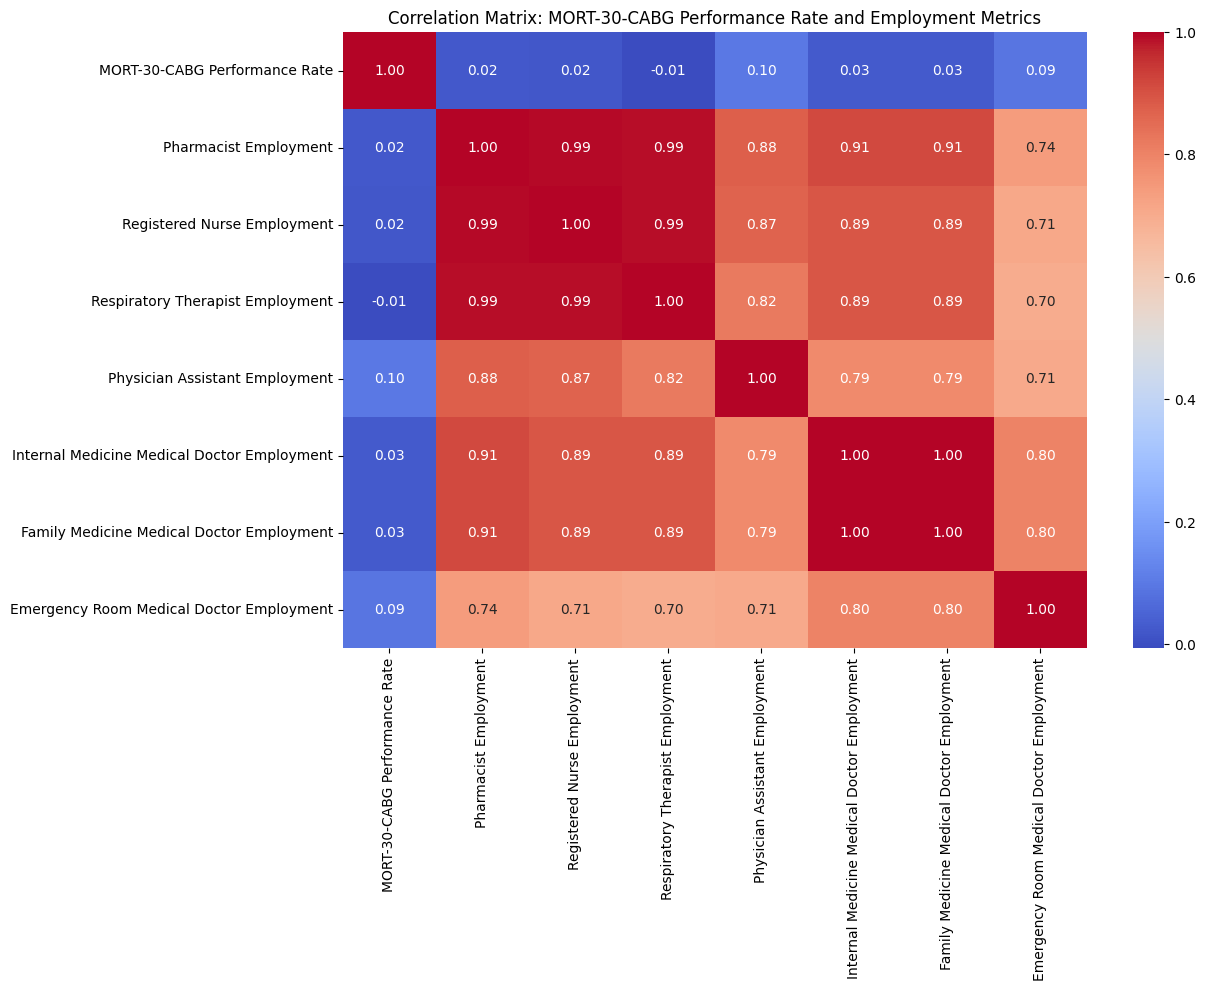

In [ ]:
#Correlation Matrix by Roles

import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import us

# File paths (same as before)
state_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/tl_2024_us_state.shp'
population_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/2024_POP.csv'
ranking = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/hospitals_current_data/hvbp_clinical_outcomes.csv'

roles = {
    'Pharmacist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Pharm.csv',
    'Registered Nurse': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RN.csv',
    'Respiratory Therapist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RT.csv',
    'Physician Assistant': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Physcian Assistant.csv',
    'Internal Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Internal.csv',
    'Family Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Family Med Doctors.csv',
    'Emergency Room Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report ER DOC.csv'
}

# Load data and preprocess (same as before)
gdf = gpd.read_file(state_data)
population_df = pd.read_csv(population_data)
population_df['State'] = population_df['State'].str.strip()
population_df['2024'] = pd.to_numeric(population_df['2024'], errors='coerce')
gdf = gdf.rename(columns={'NAME': 'State'})
merged_gdf = gdf.merge(population_df, on='State', how='left')

ranking_df = pd.read_csv(ranking)
dropped_states = []
def map_state(abbreviation):
    if abbreviation == "DC":
        return "District of Columbia"
    state = us.states.lookup(abbreviation)
    if not state:
        dropped_states.append(abbreviation)
        return None
    return state.name
ranking_df['State'] = ranking_df['State'].map(map_state)
ranking_df = ranking_df.dropna(subset=['State'])
print("Dropped state abbreviations with no match:", dropped_states)

# Select relevant columns
ranking_df = ranking_df[['State',
                         'MORT-30-AMI Performance Rate',
                         'MORT-30-HF Performance Rate',
                         'MORT-30-COPD Performance Rate',
                         'MORT-30-CABG Performance Rate']].dropna()
for col in ['MORT-30-AMI Performance Rate',
            'MORT-30-HF Performance Rate',
            'MORT-30-COPD Performance Rate',
            'MORT-30-CABG Performance Rate']:
    ranking_df[col] = pd.to_numeric(ranking_df[col], errors='coerce')
merged_gdf = merged_gdf.merge(ranking_df, on='State', how='left')

# Process roles and merge
for role, path in roles.items():
    role_df = pd.read_csv(path)
    role_df['Area Name'] = role_df['Area Name'].str.split('(').str[0].str.strip()
    role_df['Employment'] = pd.to_numeric(role_df['Employment'], errors='coerce')
    role_summary = role_df.groupby('Area Name')['Employment'].sum().reset_index()
    role_summary = role_summary.rename(columns={'Area Name': 'State', 'Employment': f'{role} Employment'})
    merged_gdf = merged_gdf.merge(role_summary, on='State', how='left')

# Function to analyze correlation by category
def analyze_category(category):
    correlation_columns = [category] + [f'{role} Employment' for role in roles.keys()]
    correlation_data = merged_gdf[correlation_columns].dropna()
    correlation_matrix = correlation_data.corr()

    # Display and visualize
    print(f"Correlation Matrix for {category}:")
    print(correlation_matrix)
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Matrix: {category} and Employment Metrics")
    plt.show()

# Analyze each category
categories = ['MORT-30-AMI Performance Rate',
              'MORT-30-HF Performance Rate',
              'MORT-30-COPD Performance Rate',
              'MORT-30-CABG Performance Rate']
for category in categories:
    analyze_category(category)


<ipython-input-12-18518246407d>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complications_df['Measure Name'] = complications_df['Measure Name'].map(relevant_conditions)


Correlation Matrix for COPD Deaths:
                                             COPD Deaths  \
COPD Deaths                                     1.000000   
Pharmacist Employment                           0.899928   
Registered Nurse Employment                     0.911989   
Respiratory Therapist Employment                0.889058   
Physician Assistant Employment                  0.822296   
Internal Medicine Medical Doctor Employment     0.800145   
Family Medicine Medical Doctor Employment       0.800145   
Emergency Room Medical Doctor Employment        0.594152   

                                             Pharmacist Employment  \
COPD Deaths                                               0.899928   
Pharmacist Employment                                     1.000000   
Registered Nurse Employment                               0.993024   
Respiratory Therapist Employment                          0.982563   
Physician Assistant Employment                            0.883606   
Int

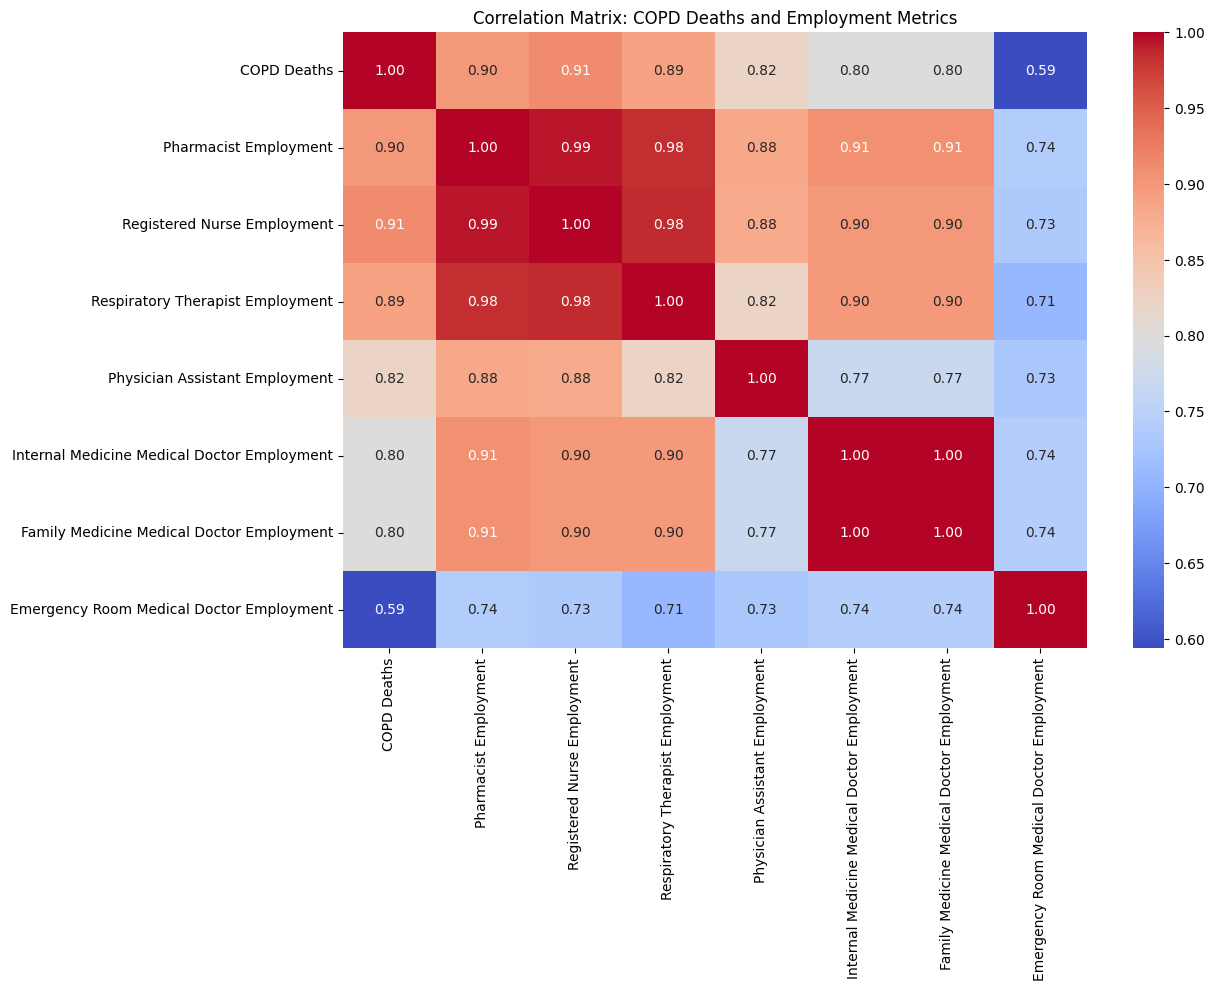

Correlation Matrix for Heart Failure Deaths:
                                             Heart Failure Deaths  \
Heart Failure Deaths                                     1.000000   
Pharmacist Employment                                    0.942396   
Registered Nurse Employment                              0.953749   
Respiratory Therapist Employment                         0.924161   
Physician Assistant Employment                           0.855310   
Internal Medicine Medical Doctor Employment              0.848813   
Family Medicine Medical Doctor Employment                0.848813   
Emergency Room Medical Doctor Employment                 0.637975   

                                             Pharmacist Employment  \
Heart Failure Deaths                                      0.942396   
Pharmacist Employment                                     1.000000   
Registered Nurse Employment                               0.993024   
Respiratory Therapist Employment                     

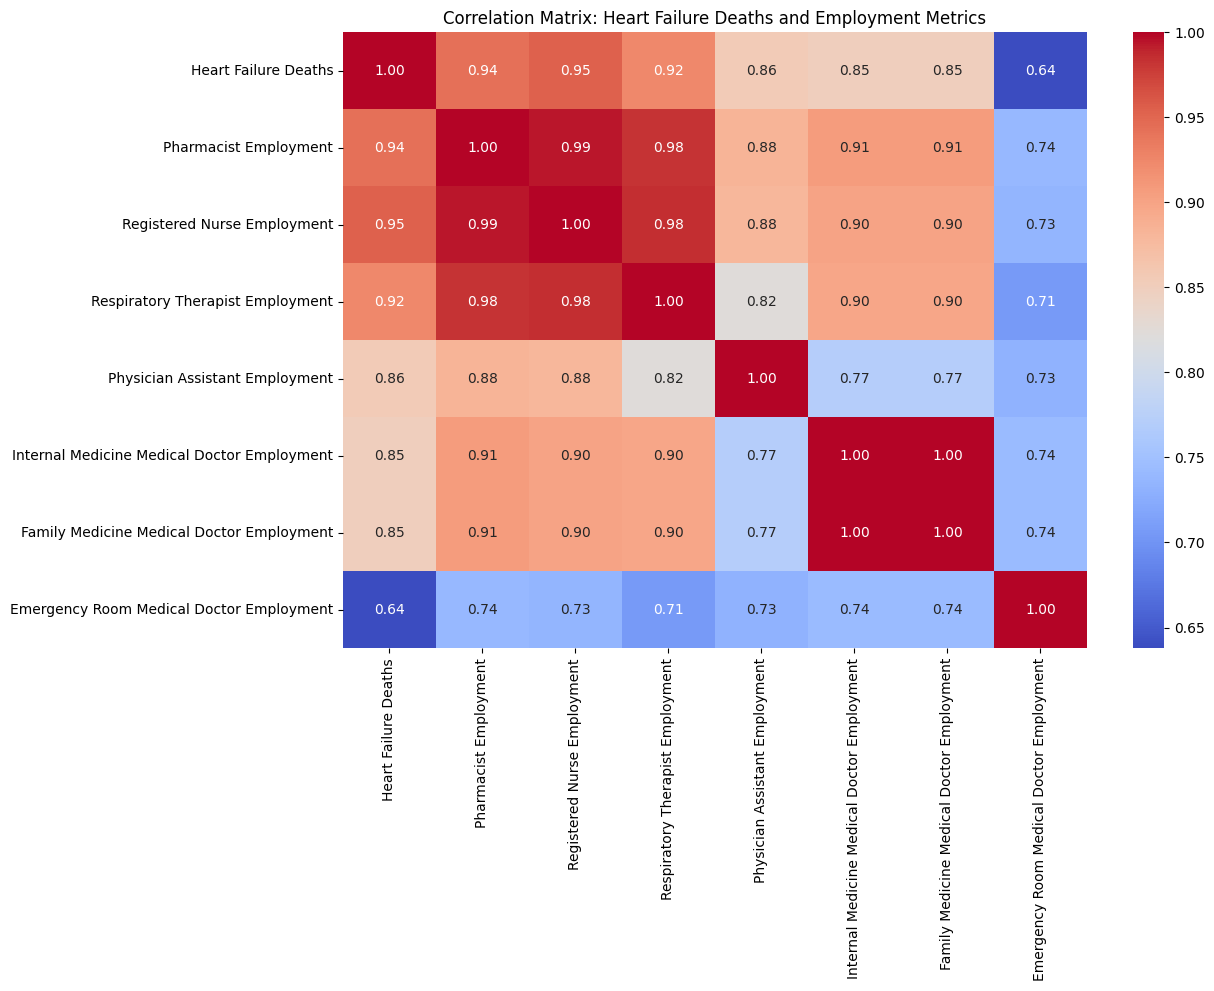

Correlation Matrix for Pneumonia Deaths:
                                             Pneumonia Deaths  \
Pneumonia Deaths                                     1.000000   
Pharmacist Employment                                0.950074   
Registered Nurse Employment                          0.960711   
Respiratory Therapist Employment                     0.945176   
Physician Assistant Employment                       0.852708   
Internal Medicine Medical Doctor Employment          0.850679   
Family Medicine Medical Doctor Employment            0.850679   
Emergency Room Medical Doctor Employment             0.662716   

                                             Pharmacist Employment  \
Pneumonia Deaths                                          0.950074   
Pharmacist Employment                                     1.000000   
Registered Nurse Employment                               0.993024   
Respiratory Therapist Employment                          0.982563   
Physician Assistant Emp

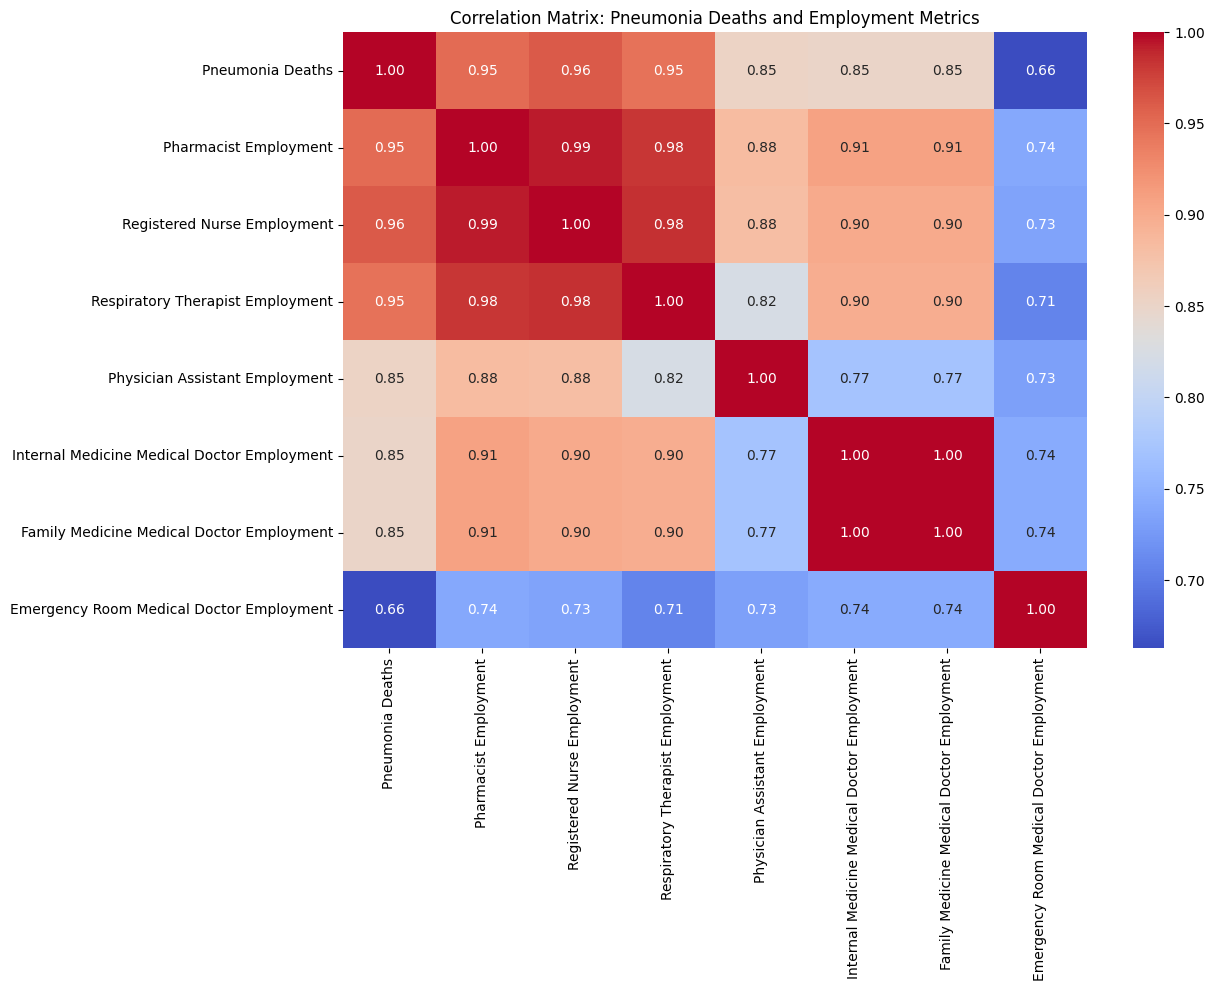

Correlation Matrix for Total Deaths:
                                             Total Deaths  \
Total Deaths                                     1.000000   
Pharmacist Employment                            0.945138   
Registered Nurse Employment                      0.956332   
Respiratory Therapist Employment                 0.933585   
Physician Assistant Employment                   0.854358   
Internal Medicine Medical Doctor Employment      0.847712   
Family Medicine Medical Doctor Employment        0.847712   
Emergency Room Medical Doctor Employment         0.646358   

                                             Pharmacist Employment  \
Total Deaths                                              0.945138   
Pharmacist Employment                                     1.000000   
Registered Nurse Employment                               0.993024   
Respiratory Therapist Employment                          0.982563   
Physician Assistant Employment                            0.883

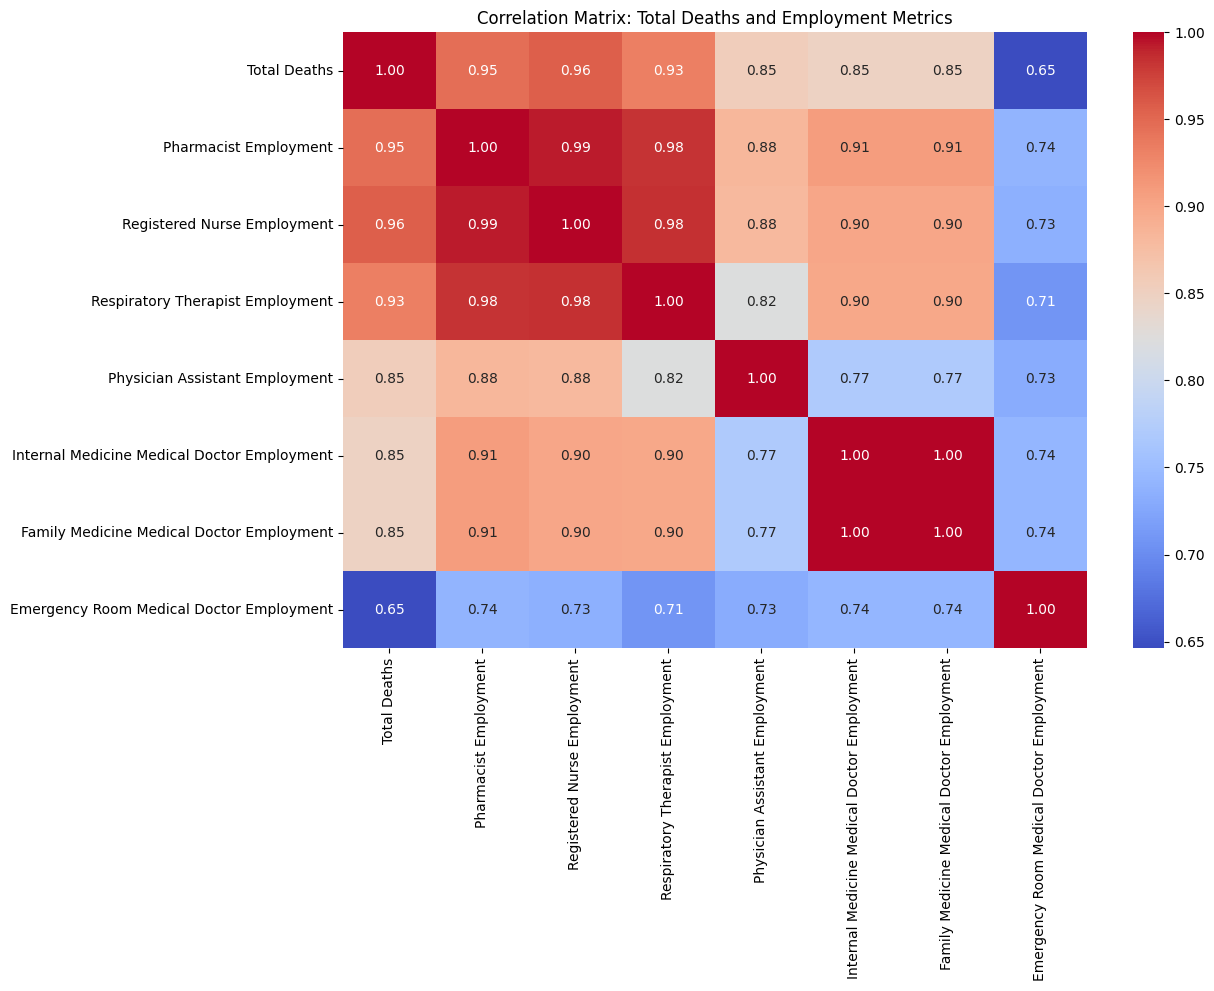

In [ ]:
#Correlation Matrix by Roles

import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import us  # For state name conversion

# File paths
state_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/tl_2024_us_state.shp'
population_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/2024_POP.csv'
complications_and_deaths = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/hospitals_current_data/Complications_and_Deaths-Hospital.csv'

roles = {
    'Pharmacist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Pharm.csv',
    'Registered Nurse': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RN.csv',
    'Respiratory Therapist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RT.csv',
    'Physician Assistant': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Physcian Assistant.csv',
    'Internal Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Internal.csv',
    'Family Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Family Med Doctors.csv',
    'Emergency Room Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report ER DOC.csv'
}

# Load state shapefile
gdf = gpd.read_file(state_data)

# Load population data
population_df = pd.read_csv(population_data)
population_df['State'] = population_df['State'].str.strip()
population_df['2024'] = pd.to_numeric(population_df['2024'], errors='coerce')
gdf = gdf.rename(columns={'NAME': 'State'})
merged_gdf = gdf.merge(population_df, on='State', how='left')

# Load and process complications and deaths data
complications_df = pd.read_csv(complications_and_deaths)

# Replace "Not Available" or invalid entries in Denominator with NaN
complications_df['Denominator'] = pd.to_numeric(complications_df['Denominator'], errors='coerce')

# Drop rows with missing Denominator
complications_df = complications_df.dropna(subset=['Denominator'])

# Map state abbreviations to full names
def map_state_name(abbreviation):
    state = us.states.lookup(abbreviation)
    return state.name if state else None

complications_df['State'] = complications_df['State'].apply(map_state_name)

# Filter for relevant conditions in Measure Name
relevant_conditions = {
    'Death rate for COPD patients': 'COPD Deaths',
    'Death rate for heart failure patients': 'Heart Failure Deaths',
    'Death rate for pneumonia patients': 'Pneumonia Deaths'
}
complications_df = complications_df[complications_df['Measure Name'].isin(relevant_conditions.keys())]
complications_df['Measure Name'] = complications_df['Measure Name'].map(relevant_conditions)

# Aggregate data by state and condition
complications_by_state = complications_df.groupby(['State', 'Measure Name'])['Denominator'].sum().unstack(fill_value=0).reset_index()
complications_by_state['Total Deaths'] = complications_by_state.drop(columns=['State']).sum(axis=1)

# Merge complications data with GeoDataFrame
merged_gdf = merged_gdf.merge(complications_by_state, on='State', how='left')

# Process roles and merge
for role, path in roles.items():
    role_df = pd.read_csv(path)
    role_df['Area Name'] = role_df['Area Name'].str.split('(').str[0].str.strip()
    role_df['Employment'] = pd.to_numeric(role_df['Employment'], errors='coerce')
    role_summary = role_df.groupby('Area Name')['Employment'].sum().reset_index()
    role_summary = role_summary.rename(columns={'Area Name': 'State', 'Employment': f'{role} Employment'})
    merged_gdf = merged_gdf.merge(role_summary, on='State', how='left')

# Function to analyze correlation by death category
def analyze_death_category(category):
    correlation_columns = [category] + [f'{role} Employment' for role in roles.keys()]
    correlation_data = merged_gdf[correlation_columns].dropna()
    correlation_matrix = correlation_data.corr()

    # Display and visualize
    print(f"Correlation Matrix for {category}:")
    print(correlation_matrix)
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Matrix: {category} and Employment Metrics")
    plt.show()

# Analyze each death category
death_categories = ['COPD Deaths', 'Heart Failure Deaths', 'Pneumonia Deaths', 'Total Deaths']
for category in death_categories:
    analyze_death_category(category)


Condition: COPD Deaths, Role: Respiratory Therapist Employment
Average COPD Deaths Per Capita (Top 10 States with Highest Respiratory Therapist Employment): 76.79195357740824
Average COPD Deaths Per Capita (Bottom 10 States with Lowest Respiratory Therapist Employment): 98.99691843178037
T-Statistic: -1.5334058310273406, P-Value: 0.15142687839580712
--------------------------------------------------


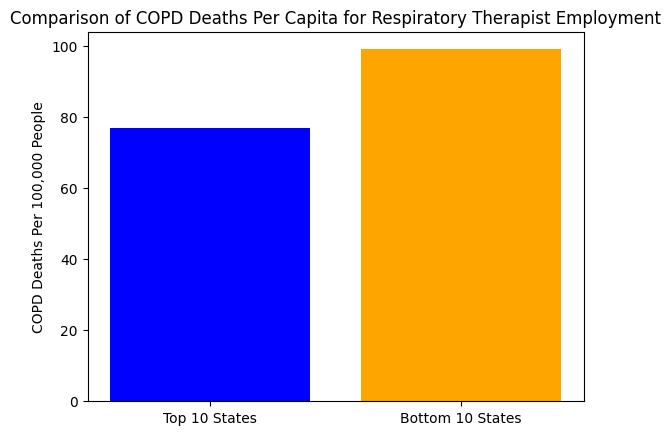

Condition: COPD Deaths, Role: Registered Nurse Employment
Average COPD Deaths Per Capita (Top 10 States with Highest Registered Nurse Employment): 76.79195357740824
Average COPD Deaths Per Capita (Bottom 10 States with Lowest Registered Nurse Employment): 99.74575146952091
T-Statistic: -1.4321607320890015, P-Value: 0.18346935876571135
--------------------------------------------------


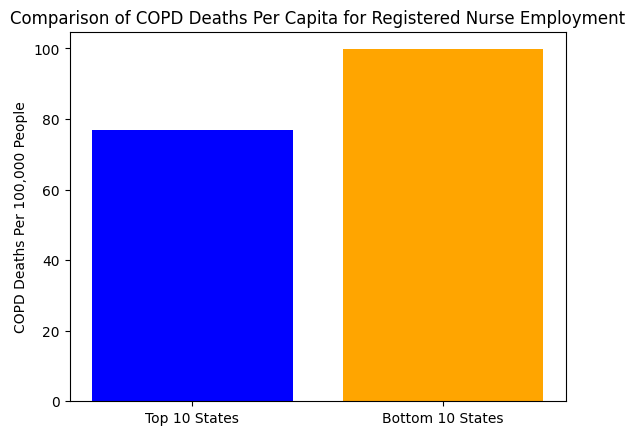

Condition: COPD Deaths, Role: Pharmacist Employment
Average COPD Deaths Per Capita (Top 10 States with Highest Pharmacist Employment): 76.1549453890543
Average COPD Deaths Per Capita (Bottom 10 States with Lowest Pharmacist Employment): 108.80436505218087
T-Statistic: -2.8427351759622983, P-Value: 0.014245870135012932
--------------------------------------------------


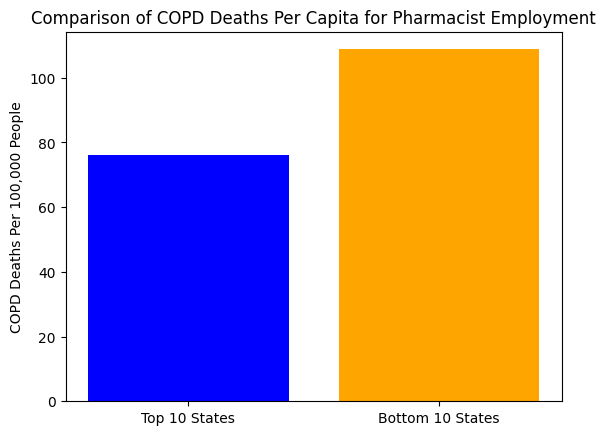

Condition: COPD Deaths, Role: Physician Assistant Employment
Average COPD Deaths Per Capita (Top 10 States with Highest Physician Assistant Employment): 82.8879375199468
Average COPD Deaths Per Capita (Bottom 10 States with Lowest Physician Assistant Employment): 92.14435406498515
T-Statistic: -0.6170090645579888, P-Value: 0.547696994284779
--------------------------------------------------


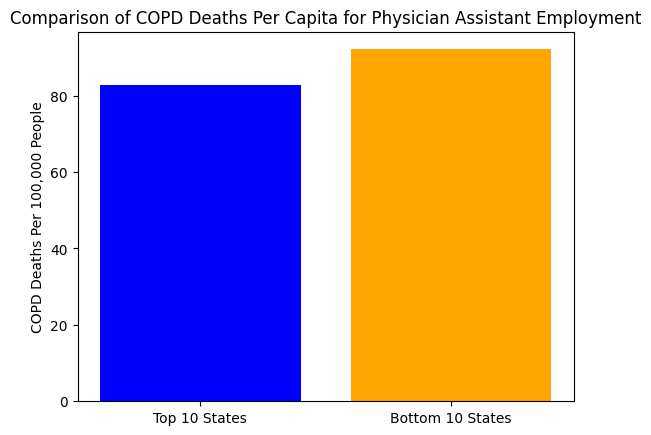

Condition: COPD Deaths, Role: Internal Medicine Medical Doctor Employment
Average COPD Deaths Per Capita (Top 10 States with Highest Internal Medicine Medical Doctor Employment): 77.80008030711947
Average COPD Deaths Per Capita (Bottom 10 States with Lowest Internal Medicine Medical Doctor Employment): 102.1008448166353
T-Statistic: -1.3585047592789703, P-Value: 0.20043931286041028
--------------------------------------------------


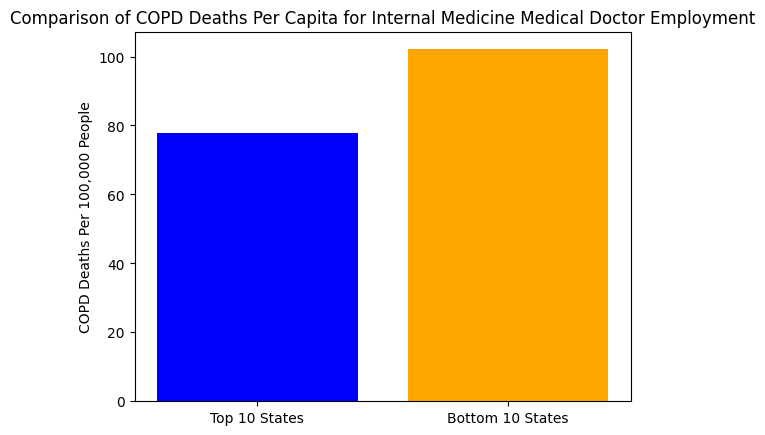

Condition: COPD Deaths, Role: Family Medicine Medical Doctor Employment
Average COPD Deaths Per Capita (Top 10 States with Highest Family Medicine Medical Doctor Employment): 77.80008030711947
Average COPD Deaths Per Capita (Bottom 10 States with Lowest Family Medicine Medical Doctor Employment): 102.1008448166353
T-Statistic: -1.3585047592789703, P-Value: 0.20043931286041028
--------------------------------------------------


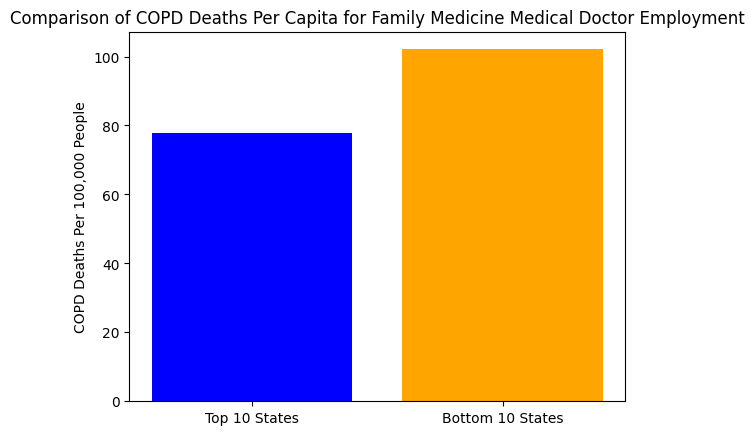

Condition: COPD Deaths, Role: Emergency Room Medical Doctor Employment
Average COPD Deaths Per Capita (Top 10 States with Highest Emergency Room Medical Doctor Employment): 72.04590410940473
Average COPD Deaths Per Capita (Bottom 10 States with Lowest Emergency Room Medical Doctor Employment): 75.21238057570682
T-Statistic: -0.23073565459822123, P-Value: 0.8204417350444666
--------------------------------------------------


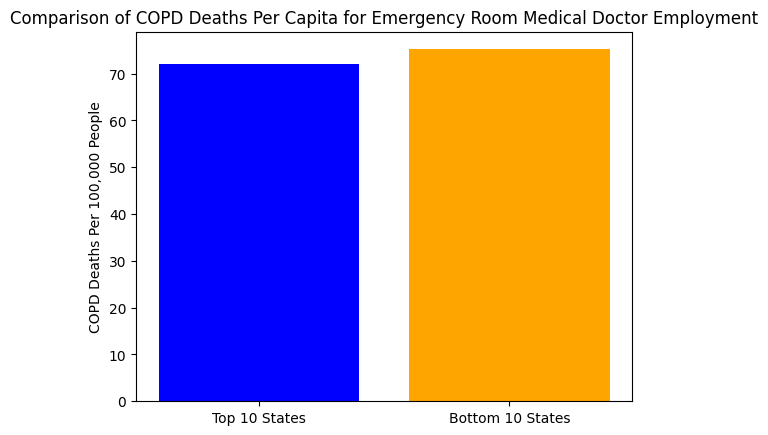

Condition: Heart Failure Deaths, Role: Respiratory Therapist Employment
Average Heart Failure Deaths Per Capita (Top 10 States with Highest Respiratory Therapist Employment): 251.40704788443
Average Heart Failure Deaths Per Capita (Bottom 10 States with Lowest Respiratory Therapist Employment): 286.37929679308087
T-Statistic: -0.9721352857879211, P-Value: 0.3480091700721779
--------------------------------------------------


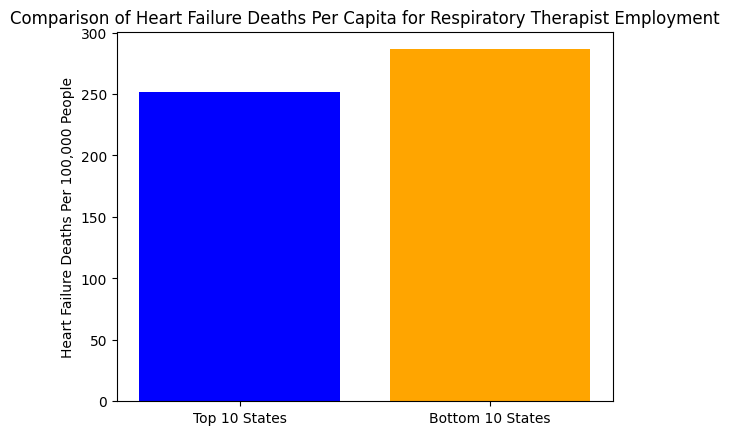

Condition: Heart Failure Deaths, Role: Registered Nurse Employment
Average Heart Failure Deaths Per Capita (Top 10 States with Highest Registered Nurse Employment): 251.40704788443
Average Heart Failure Deaths Per Capita (Bottom 10 States with Lowest Registered Nurse Employment): 287.1101066810464
T-Statistic: -0.9038026160553172, P-Value: 0.3853804289404149
--------------------------------------------------


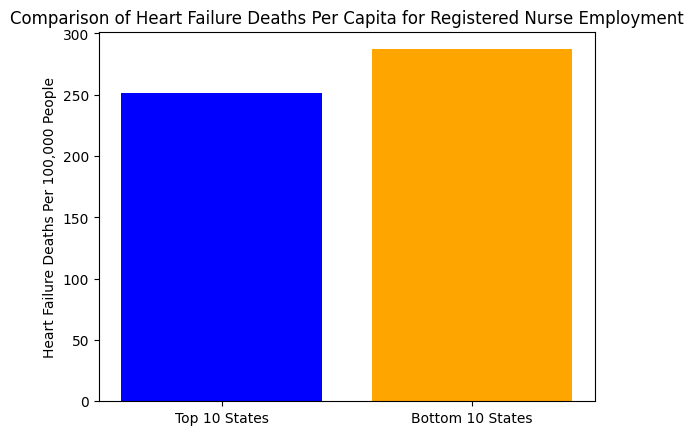

Condition: Heart Failure Deaths, Role: Pharmacist Employment
Average Heart Failure Deaths Per Capita (Top 10 States with Highest Pharmacist Employment): 254.04933148647643
Average Heart Failure Deaths Per Capita (Bottom 10 States with Lowest Pharmacist Employment): 306.6526884959351
T-Statistic: -1.6197351902484347, P-Value: 0.1279890352675297
--------------------------------------------------


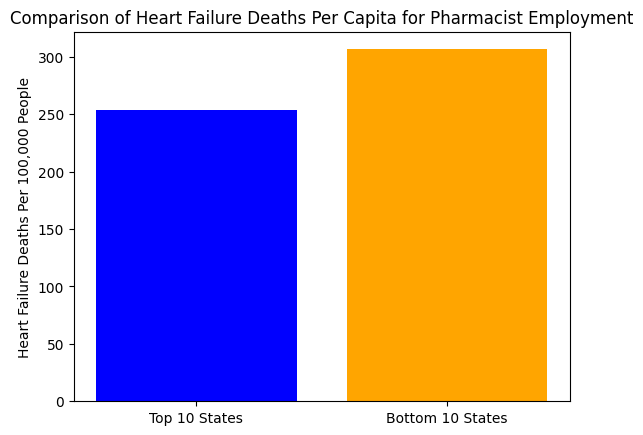

Condition: Heart Failure Deaths, Role: Physician Assistant Employment
Average Heart Failure Deaths Per Capita (Top 10 States with Highest Physician Assistant Employment): 271.0579312297317
Average Heart Failure Deaths Per Capita (Bottom 10 States with Lowest Physician Assistant Employment): 266.67213686032807
T-Statistic: 0.11554197949780969, P-Value: 0.9094631320252691
--------------------------------------------------


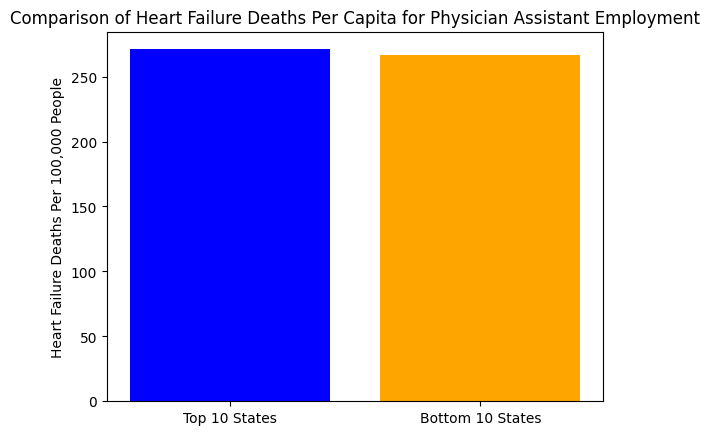

Condition: Heart Failure Deaths, Role: Internal Medicine Medical Doctor Employment
Average Heart Failure Deaths Per Capita (Top 10 States with Highest Internal Medicine Medical Doctor Employment): 265.1430356692702
Average Heart Failure Deaths Per Capita (Bottom 10 States with Lowest Internal Medicine Medical Doctor Employment): 283.80121770991104
T-Statistic: -0.4966932012231575, P-Value: 0.6259062566043184
--------------------------------------------------


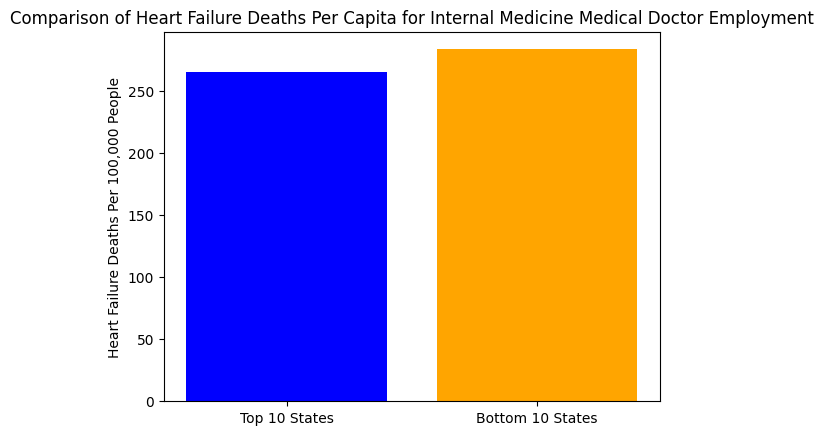

Condition: Heart Failure Deaths, Role: Family Medicine Medical Doctor Employment
Average Heart Failure Deaths Per Capita (Top 10 States with Highest Family Medicine Medical Doctor Employment): 265.1430356692702
Average Heart Failure Deaths Per Capita (Bottom 10 States with Lowest Family Medicine Medical Doctor Employment): 283.80121770991104
T-Statistic: -0.4966932012231575, P-Value: 0.6259062566043184
--------------------------------------------------


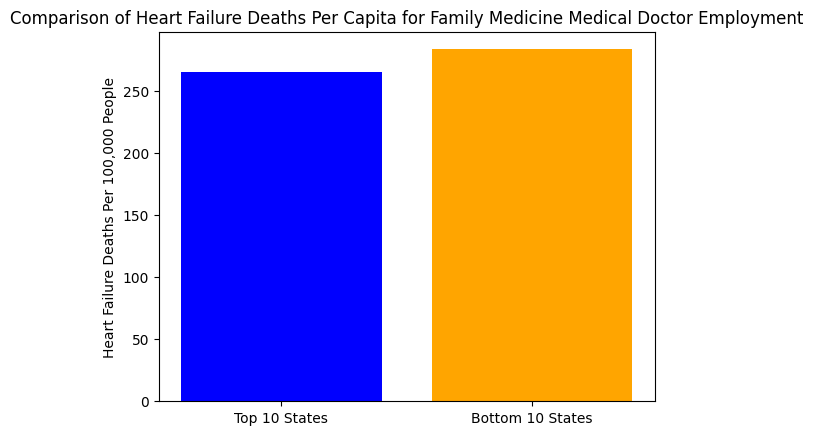

Condition: Heart Failure Deaths, Role: Emergency Room Medical Doctor Employment
Average Heart Failure Deaths Per Capita (Top 10 States with Highest Emergency Room Medical Doctor Employment): 244.6768419651608
Average Heart Failure Deaths Per Capita (Bottom 10 States with Lowest Emergency Room Medical Doctor Employment): 225.45700367931826
T-Statistic: 0.6267772837075617, P-Value: 0.5387045573144882
--------------------------------------------------


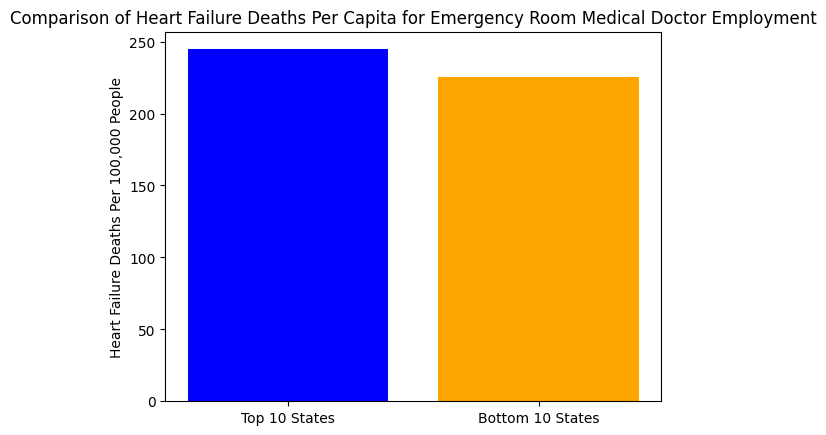

Condition: Pneumonia Deaths, Role: Respiratory Therapist Employment
Average Pneumonia Deaths Per Capita (Top 10 States with Highest Respiratory Therapist Employment): 230.40656209575664
Average Pneumonia Deaths Per Capita (Bottom 10 States with Lowest Respiratory Therapist Employment): 287.51638758472245
T-Statistic: -1.6882334225879636, P-Value: 0.11920655053686792
--------------------------------------------------


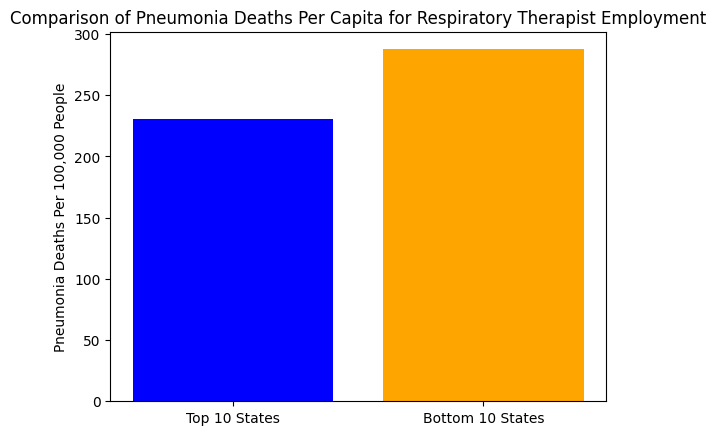

Condition: Pneumonia Deaths, Role: Registered Nurse Employment
Average Pneumonia Deaths Per Capita (Top 10 States with Highest Registered Nurse Employment): 230.40656209575664
Average Pneumonia Deaths Per Capita (Bottom 10 States with Lowest Registered Nurse Employment): 285.4693700291942
T-Statistic: -1.465528679745238, P-Value: 0.17619605828928453
--------------------------------------------------


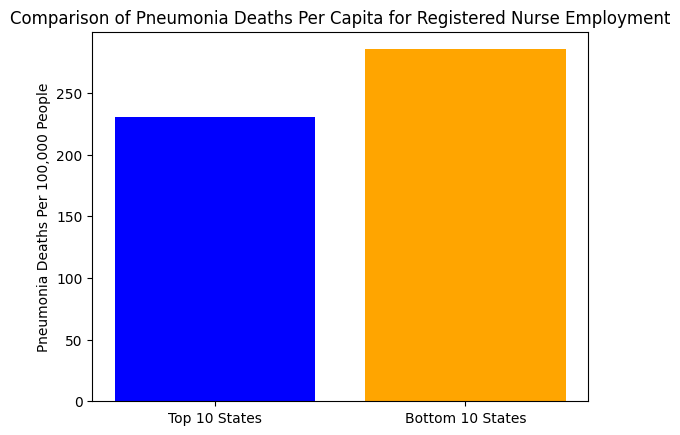

Condition: Pneumonia Deaths, Role: Pharmacist Employment
Average Pneumonia Deaths Per Capita (Top 10 States with Highest Pharmacist Employment): 235.38078867776062
Average Pneumonia Deaths Per Capita (Bottom 10 States with Lowest Pharmacist Employment): 302.9445215559895
T-Statistic: -2.0152229482519504, P-Value: 0.07142163829109933
--------------------------------------------------


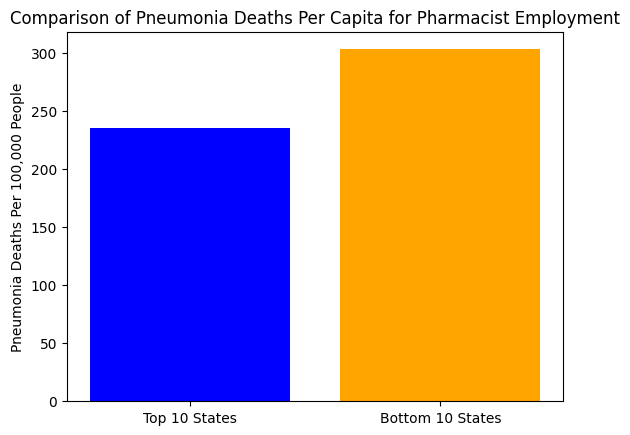

Condition: Pneumonia Deaths, Role: Physician Assistant Employment
Average Pneumonia Deaths Per Capita (Top 10 States with Highest Physician Assistant Employment): 245.75901000259077
Average Pneumonia Deaths Per Capita (Bottom 10 States with Lowest Physician Assistant Employment): 289.3472217743839
T-Statistic: -1.1048759513932338, P-Value: 0.2910352513430051
--------------------------------------------------


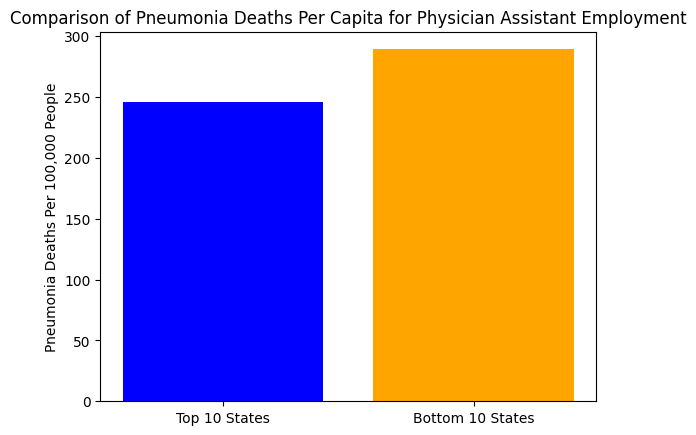

Condition: Pneumonia Deaths, Role: Internal Medicine Medical Doctor Employment
Average Pneumonia Deaths Per Capita (Top 10 States with Highest Internal Medicine Medical Doctor Employment): 245.78495899034723
Average Pneumonia Deaths Per Capita (Bottom 10 States with Lowest Internal Medicine Medical Doctor Employment): 309.0422570946633
T-Statistic: -1.6662406699942363, P-Value: 0.1222575391987704
--------------------------------------------------


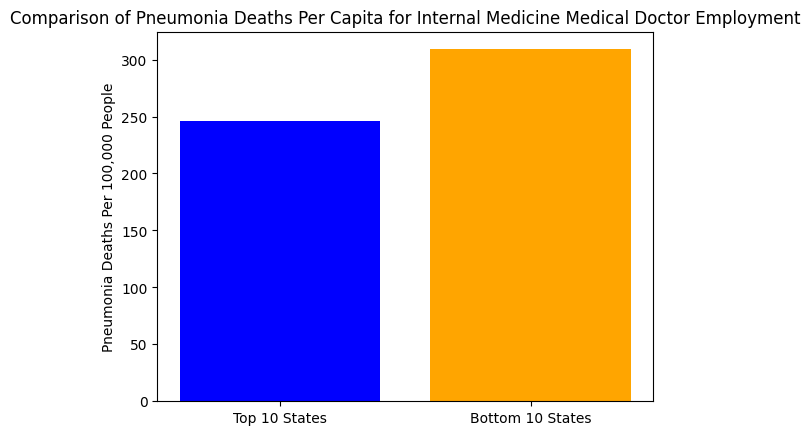

Condition: Pneumonia Deaths, Role: Family Medicine Medical Doctor Employment
Average Pneumonia Deaths Per Capita (Top 10 States with Highest Family Medicine Medical Doctor Employment): 245.78495899034723
Average Pneumonia Deaths Per Capita (Bottom 10 States with Lowest Family Medicine Medical Doctor Employment): 309.0422570946633
T-Statistic: -1.6662406699942363, P-Value: 0.1222575391987704
--------------------------------------------------


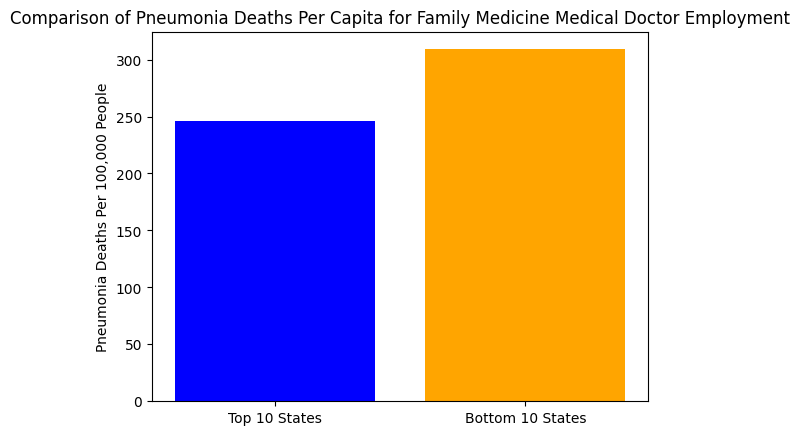

Condition: Pneumonia Deaths, Role: Emergency Room Medical Doctor Employment
Average Pneumonia Deaths Per Capita (Top 10 States with Highest Emergency Room Medical Doctor Employment): 217.4614147811557
Average Pneumonia Deaths Per Capita (Bottom 10 States with Lowest Emergency Room Medical Doctor Employment): 242.87664509665439
T-Statistic: -0.7501738543780306, P-Value: 0.4637345846732076
--------------------------------------------------


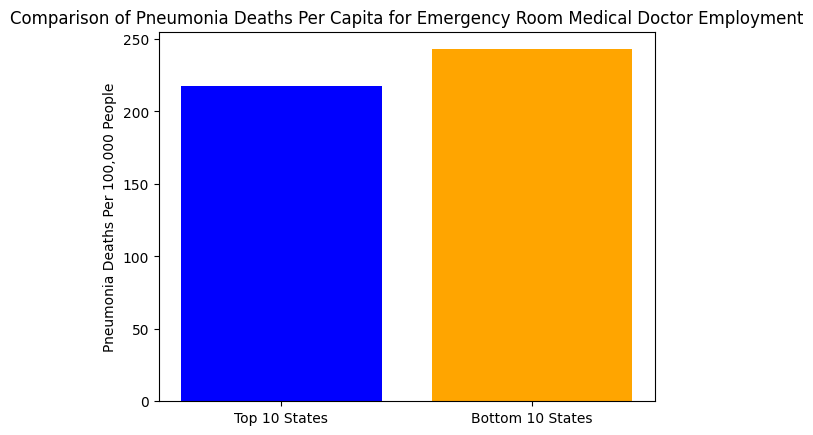

Condition: Total Deaths, Role: Respiratory Therapist Employment
Average Total Deaths Per Capita (Top 10 States with Highest Respiratory Therapist Employment): 558.6055635575949
Average Total Deaths Per Capita (Bottom 10 States with Lowest Respiratory Therapist Employment): 672.8926028095837
T-Statistic: -1.4461804968550362, P-Value: 0.17292686261306528
--------------------------------------------------


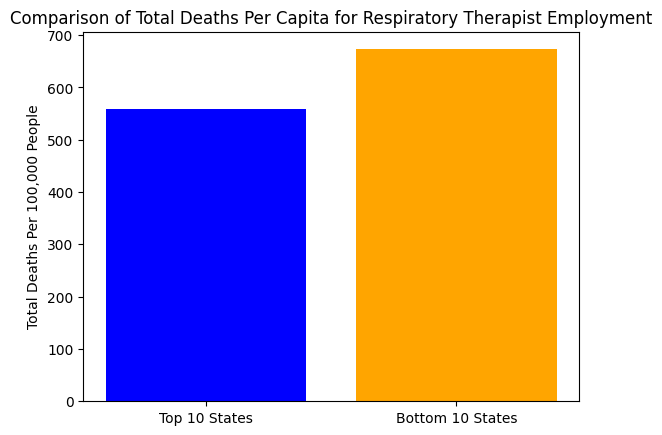

Condition: Total Deaths, Role: Registered Nurse Employment
Average Total Deaths Per Capita (Top 10 States with Highest Registered Nurse Employment): 558.6055635575949
Average Total Deaths Per Capita (Bottom 10 States with Lowest Registered Nurse Employment): 672.3252281797613
T-Statistic: -1.302142655965588, P-Value: 0.22171316089453974
--------------------------------------------------


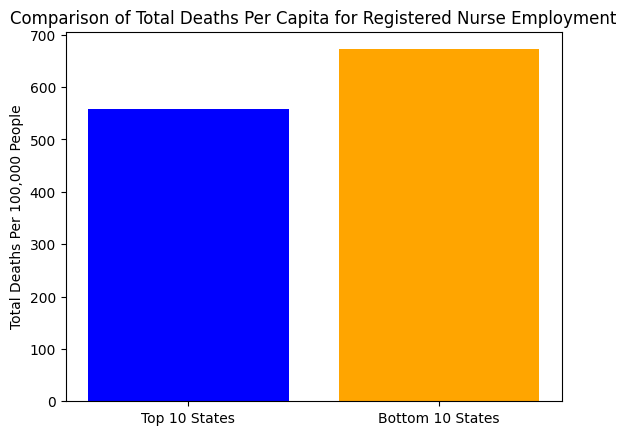

Condition: Total Deaths, Role: Pharmacist Employment
Average Total Deaths Per Capita (Top 10 States with Highest Pharmacist Employment): 565.5850655532914
Average Total Deaths Per Capita (Bottom 10 States with Lowest Pharmacist Employment): 718.4015751041054
T-Statistic: -2.147642667553793, P-Value: 0.052075478506176436
--------------------------------------------------


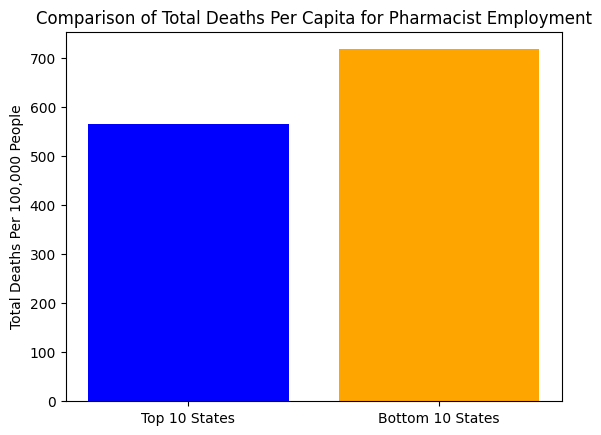

Condition: Total Deaths, Role: Physician Assistant Employment
Average Total Deaths Per Capita (Top 10 States with Highest Physician Assistant Employment): 599.7048787522692
Average Total Deaths Per Capita (Bottom 10 States with Lowest Physician Assistant Employment): 648.163712699697
T-Statistic: -0.558208997015579, P-Value: 0.5854173678651543
--------------------------------------------------


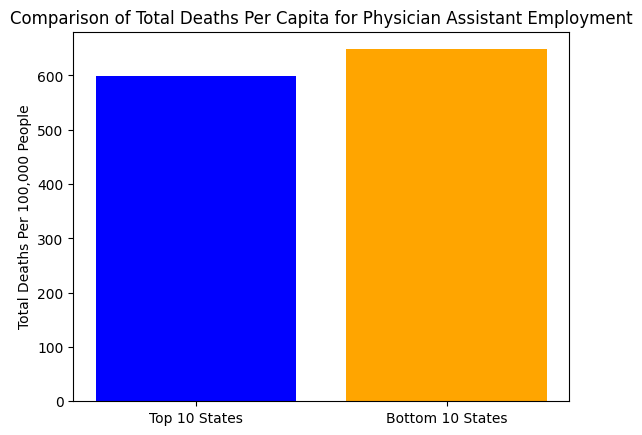

Condition: Total Deaths, Role: Internal Medicine Medical Doctor Employment
Average Total Deaths Per Capita (Top 10 States with Highest Internal Medicine Medical Doctor Employment): 588.728074966737
Average Total Deaths Per Capita (Bottom 10 States with Lowest Internal Medicine Medical Doctor Employment): 694.9443196212097
T-Statistic: -1.2220852233983488, P-Value: 0.24158994649169008
--------------------------------------------------


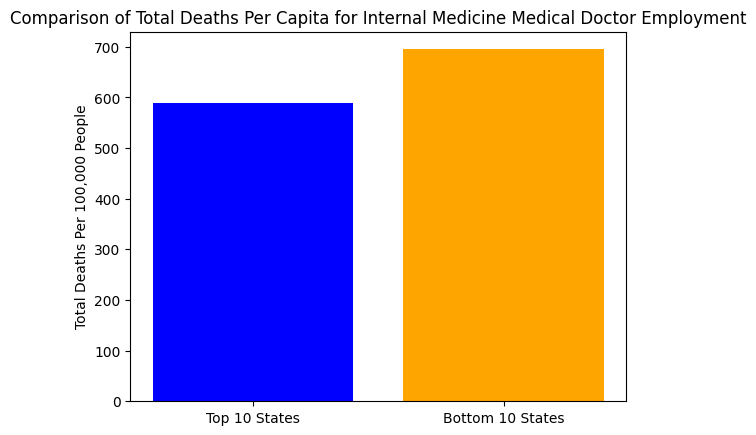

Condition: Total Deaths, Role: Family Medicine Medical Doctor Employment
Average Total Deaths Per Capita (Top 10 States with Highest Family Medicine Medical Doctor Employment): 588.728074966737
Average Total Deaths Per Capita (Bottom 10 States with Lowest Family Medicine Medical Doctor Employment): 694.9443196212097
T-Statistic: -1.2220852233983488, P-Value: 0.24158994649169008
--------------------------------------------------


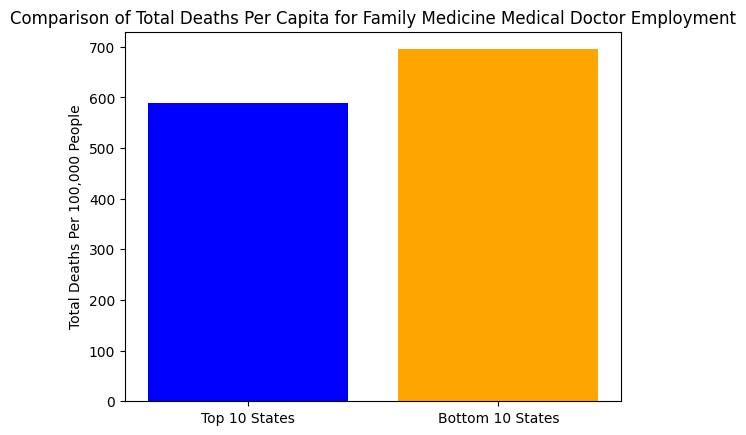

Condition: Total Deaths, Role: Emergency Room Medical Doctor Employment
Average Total Deaths Per Capita (Top 10 States with Highest Emergency Room Medical Doctor Employment): 534.1841608557213
Average Total Deaths Per Capita (Bottom 10 States with Lowest Emergency Room Medical Doctor Employment): 543.5460293516795
T-Statistic: -0.12372120456202858, P-Value: 0.9029471758922434
--------------------------------------------------


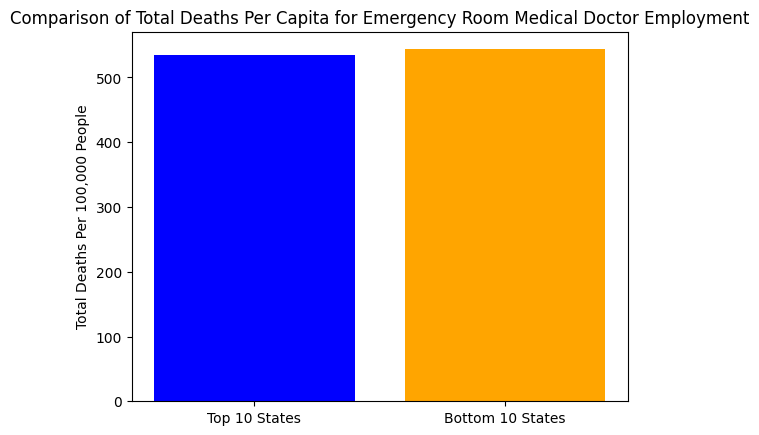

Regression Analysis for COPD Deaths:
                                 OLS Regression Results                                
Dep. Variable:     Q("COPD Deaths Per Capita")   R-squared:                       0.081
Model:                                     OLS   Adj. R-squared:                 -0.068
Method:                          Least Squares   F-statistic:                    0.5452
Date:                         Wed, 15 Jan 2025   Prob (F-statistic):              0.770
Time:                                 02:30:21   Log-Likelihood:                -216.58
No. Observations:                           44   AIC:                             447.2
Df Residuals:                               37   BIC:                             459.6
Df Model:                                    6                                         
Covariance Type:                     nonrobust                                         
                                                       coef    std err          t  

In [ ]:
# Compare outcomes for each role - compares highest state employement per role to lowest

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu
from statsmodels.formula.api import ols

# Normalize deaths by population for all conditions
conditions = ['COPD Deaths', 'Heart Failure Deaths', 'Pneumonia Deaths', 'Total Deaths']
roles = [
    'Respiratory Therapist Employment',
    'Registered Nurse Employment',
    'Pharmacist Employment',
    'Physician Assistant Employment',
    'Internal Medicine Medical Doctor Employment',
    'Family Medicine Medical Doctor Employment',
    'Emergency Room Medical Doctor Employment'
]

for condition in conditions:
    merged_gdf[f'{condition} Per Capita'] = merged_gdf[condition] / merged_gdf['2024'] * 100000

# Analyze each condition for each role
results = []
for condition in conditions:
    for role in roles:
        # Sort states by the role employment
        merged_gdf = merged_gdf.sort_values(role, ascending=False)

        # Top 10 and Bottom 10 states by role employment
        top_10_states = merged_gdf.nlargest(10, role)
        bottom_10_states = merged_gdf.nsmallest(10, role)

        # Calculate averages for top and bottom groups
        avg_top = top_10_states[f'{condition} Per Capita'].mean()
        avg_bottom = bottom_10_states[f'{condition} Per Capita'].mean()

        # Perform a t-test if variances allow
        t_stat, p_value = ttest_ind(
            top_10_states[f'{condition} Per Capita'].dropna(),
            bottom_10_states[f'{condition} Per Capita'].dropna(),
            equal_var=False
        )

        # If t-test fails (NaN), fall back to Mann-Whitney U test
        if pd.isna(t_stat):
            t_stat, p_value = mannwhitneyu(
                top_10_states[f'{condition} Per Capita'].dropna(),
                bottom_10_states[f'{condition} Per Capita'].dropna(),
                alternative='two-sided'
            )

        # Store the results
        results.append({
            'Condition': condition,
            'Role': role,
            'Avg Top 10': avg_top,
            'Avg Bottom 10': avg_bottom,
            'T-Statistic': t_stat,
            'P-Value': p_value
        })

        # Print results for the current condition and role
        print(f"Condition: {condition}, Role: {role}")
        print(f"Average {condition} Per Capita (Top 10 States with Highest {role}): {avg_top}")
        print(f"Average {condition} Per Capita (Bottom 10 States with Lowest {role}): {avg_bottom}")
        print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
        print("-" * 50)

        # Visualize the comparison
        groups = ['Top 10 States', 'Bottom 10 States']
        values = [avg_top, avg_bottom]

        plt.bar(groups, values, color=['blue', 'orange'])
        plt.title(f'Comparison of {condition} Per Capita for {role}')
        plt.ylabel(f'{condition} Per 100,000 People')
        plt.show()

# Save results to a DataFrame for analysis
results_df = pd.DataFrame(results)

# Save results to CSV
results_df.to_csv('role_condition_analysis_results.csv', index=False)

# Perform regression analysis for deeper insights
for condition in conditions:
    formula = f'Q("{condition} Per Capita") ~ ' + ' + '.join([f'Q("{role}")' for role in roles])
    model = ols(formula, data=merged_gdf).fit()
    print(f"Regression Analysis for {condition}:")
    print(model.summary())
    print("-" * 50)


ANOVA Results for COPD Deaths and Respiratory Therapist Employment:
F-Statistic: 0.18666099189037708, P-Value: 0.8303243661044939
--------------------------------------------------


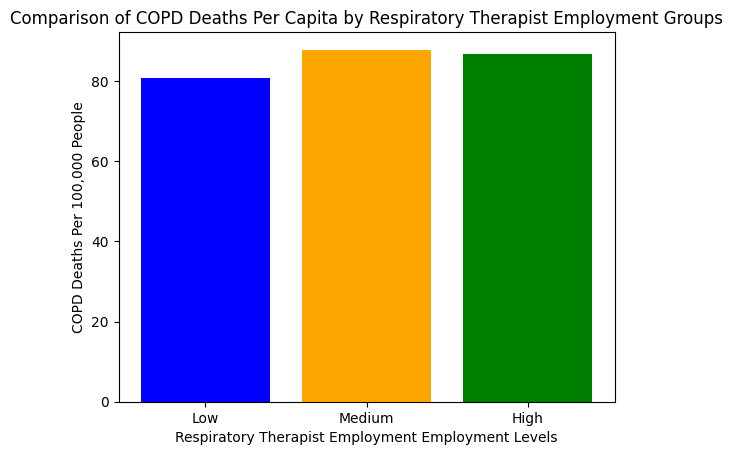

ANOVA Results for COPD Deaths and Registered Nurse Employment:
F-Statistic: 0.34821861582021196, P-Value: 0.7077130125007324
--------------------------------------------------


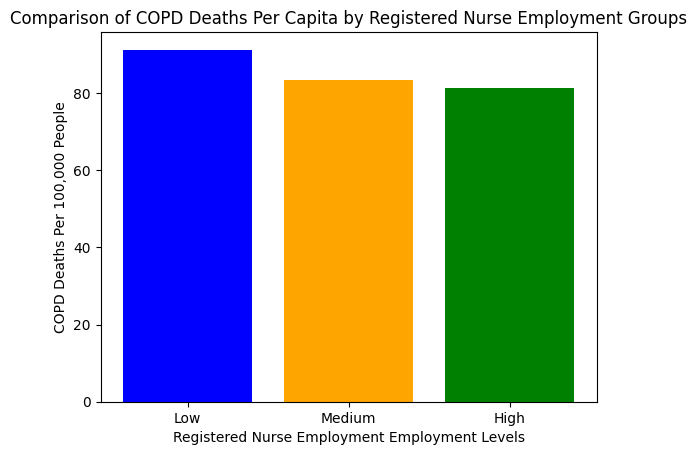

ANOVA Results for COPD Deaths and Pharmacist Employment:
F-Statistic: 0.1411340131688924, P-Value: 0.8687319513963159
--------------------------------------------------


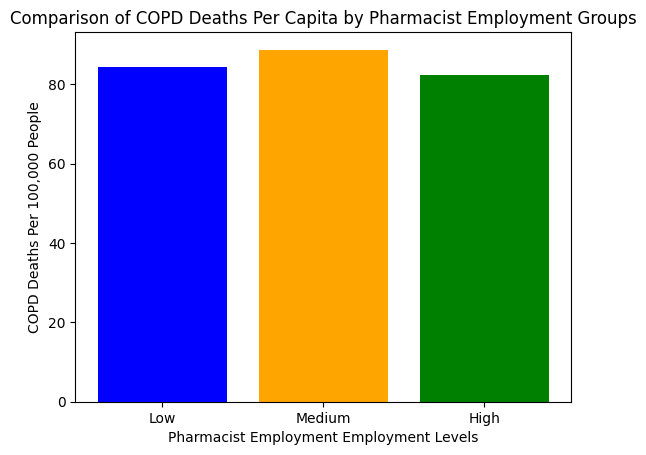

ANOVA Results for COPD Deaths and Physician Assistant Employment:
F-Statistic: 3.3005212244224635, P-Value: 0.04557520323948242
--------------------------------------------------


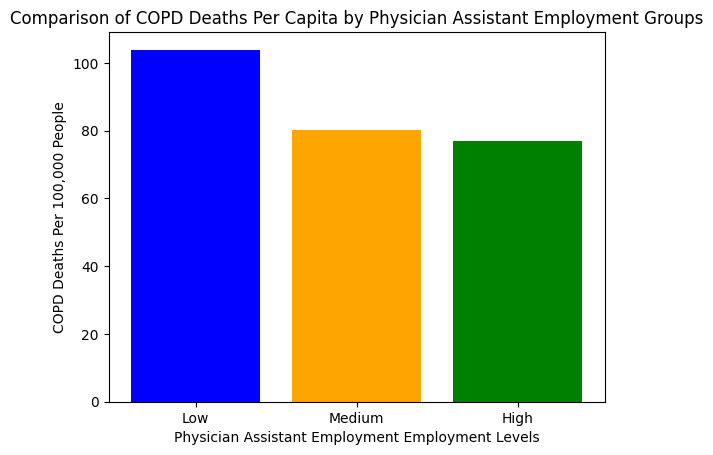

ANOVA Results for COPD Deaths and Internal Medicine Medical Doctor Employment:
F-Statistic: 1.0383074960464802, P-Value: 0.3618683099082073
--------------------------------------------------


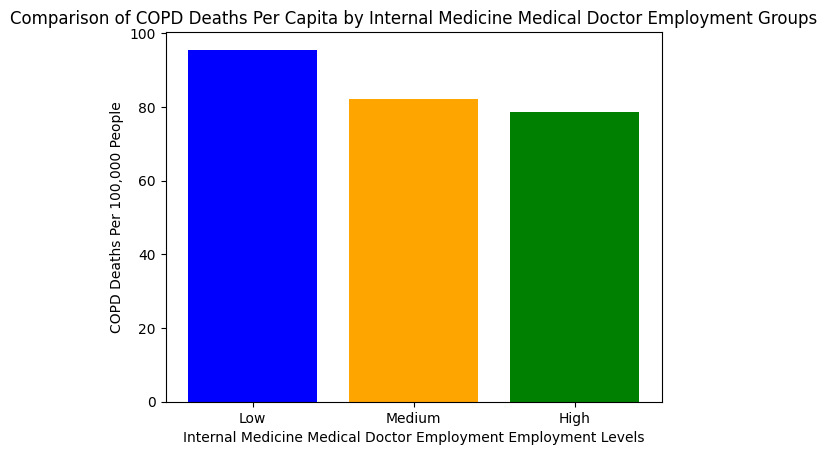

ANOVA Results for COPD Deaths and Family Medicine Medical Doctor Employment:
F-Statistic: 1.0383074960464802, P-Value: 0.3618683099082073
--------------------------------------------------


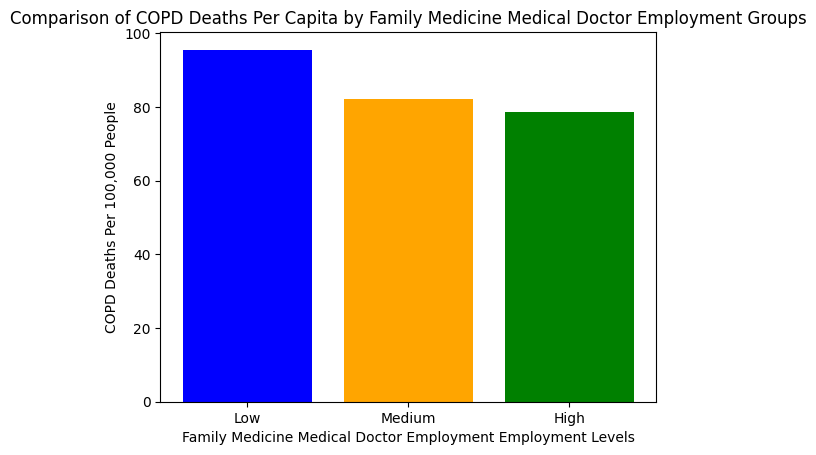

ANOVA Results for COPD Deaths and Emergency Room Medical Doctor Employment:
F-Statistic: 1.1805931249030326, P-Value: 0.31731849660177236
--------------------------------------------------


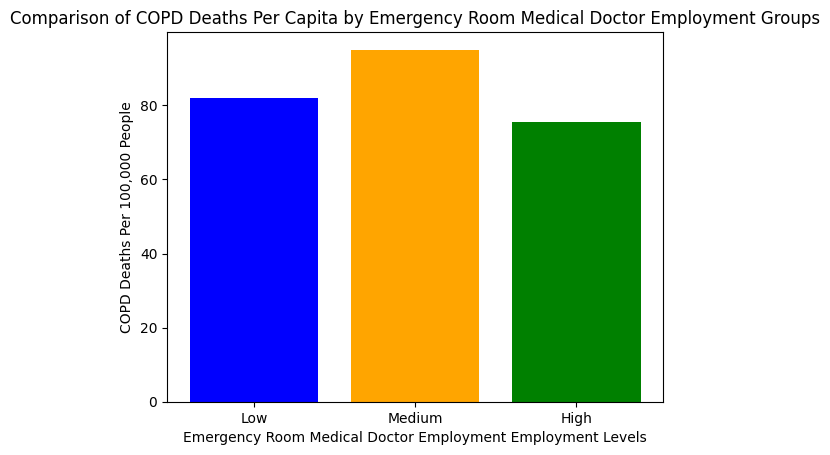

ANOVA Results for Heart Failure Deaths and Respiratory Therapist Employment:
F-Statistic: 0.4810584637367821, P-Value: 0.6210766701807557
--------------------------------------------------


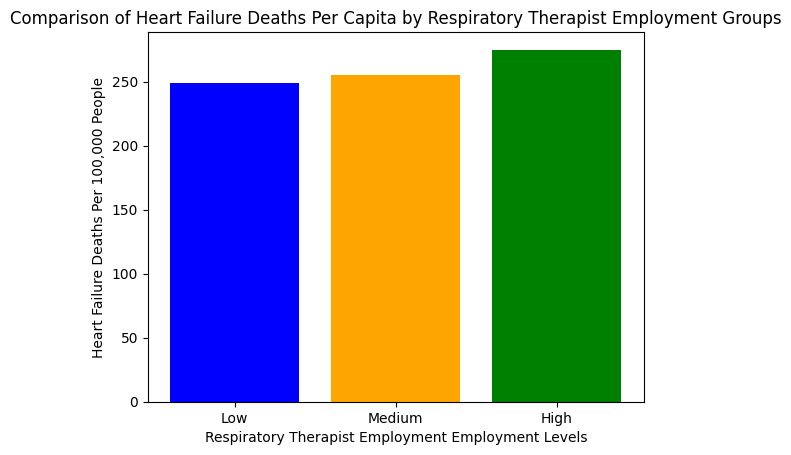

ANOVA Results for Heart Failure Deaths and Registered Nurse Employment:
F-Statistic: 0.3272154893709568, P-Value: 0.722523788242398
--------------------------------------------------


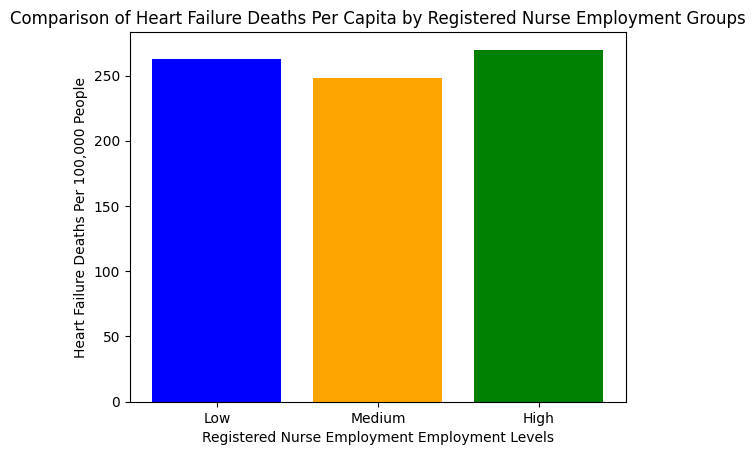

ANOVA Results for Heart Failure Deaths and Pharmacist Employment:
F-Statistic: 0.2152779191220053, P-Value: 0.8070915743422851
--------------------------------------------------


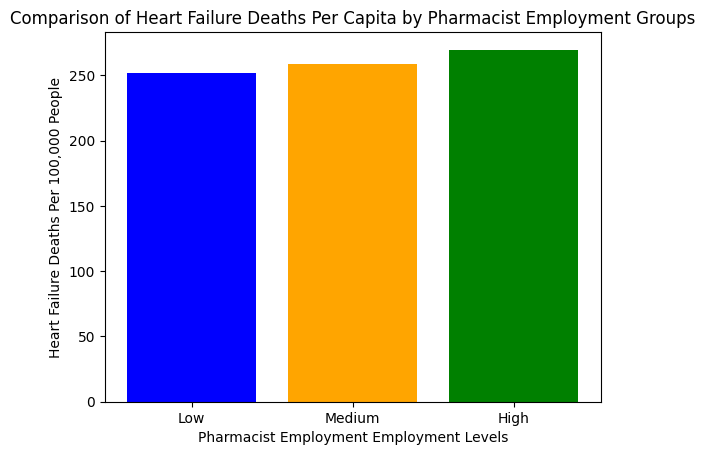

ANOVA Results for Heart Failure Deaths and Physician Assistant Employment:
F-Statistic: 1.9189791418398463, P-Value: 0.1580808642594441
--------------------------------------------------


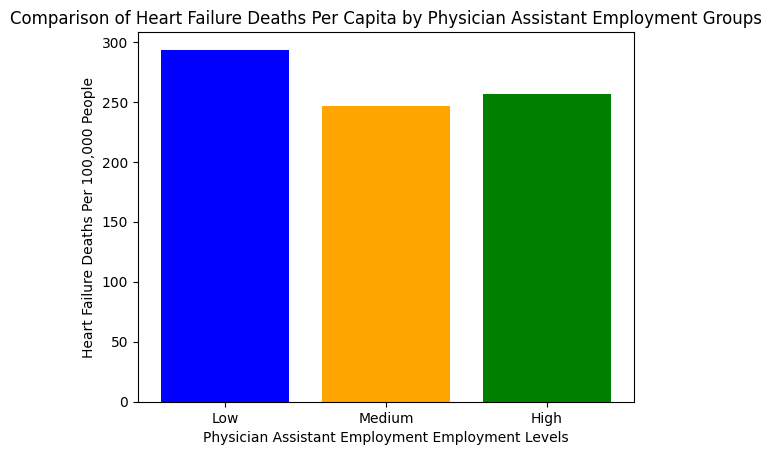

ANOVA Results for Heart Failure Deaths and Internal Medicine Medical Doctor Employment:
F-Statistic: 0.23776276331062646, P-Value: 0.7893126682482992
--------------------------------------------------


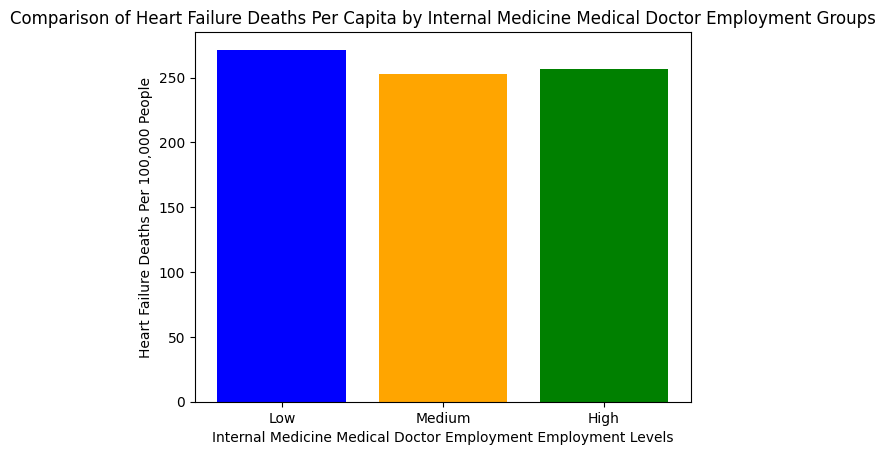

ANOVA Results for Heart Failure Deaths and Family Medicine Medical Doctor Employment:
F-Statistic: 0.23776276331062646, P-Value: 0.7893126682482992
--------------------------------------------------


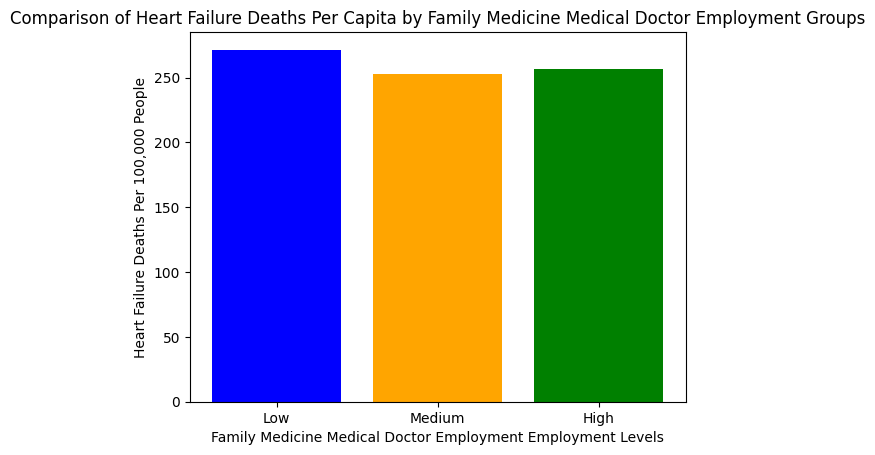

ANOVA Results for Heart Failure Deaths and Emergency Room Medical Doctor Employment:
F-Statistic: 0.4837341120996114, P-Value: 0.619950867640747
--------------------------------------------------


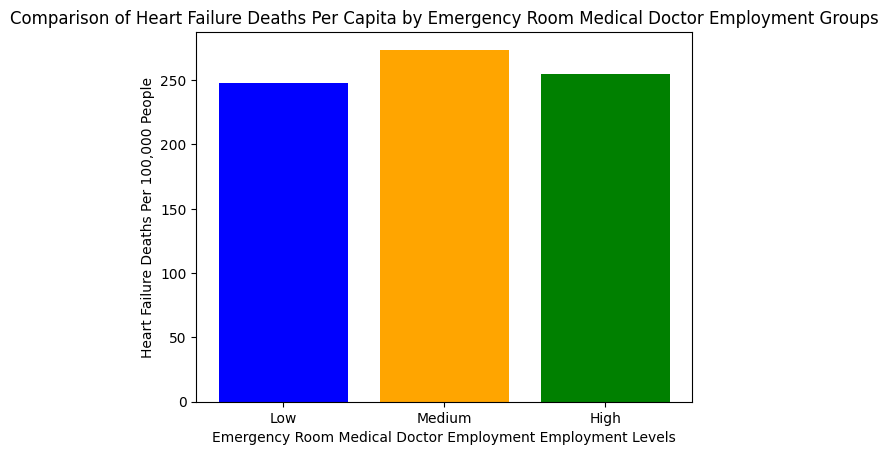

ANOVA Results for Pneumonia Deaths and Respiratory Therapist Employment:
F-Statistic: 0.09155921654731562, P-Value: 0.9126662560116389
--------------------------------------------------


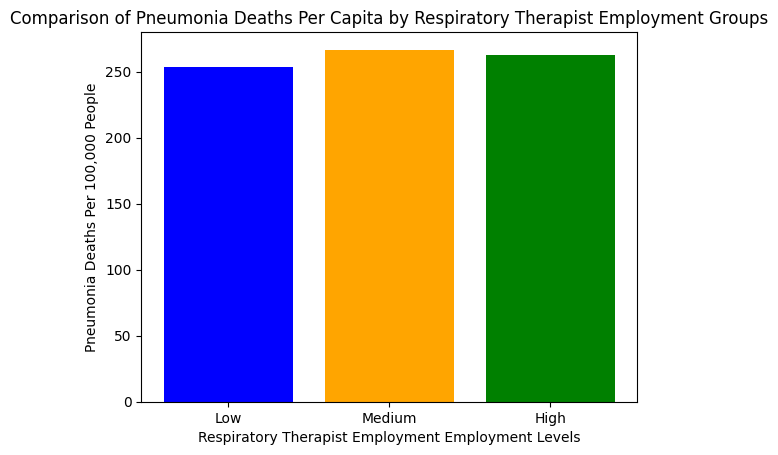

ANOVA Results for Pneumonia Deaths and Registered Nurse Employment:
F-Statistic: 0.3276368777170129, P-Value: 0.7222234853739811
--------------------------------------------------


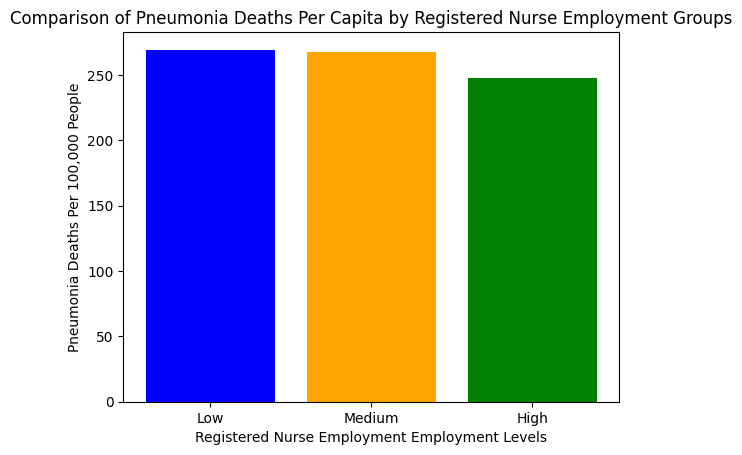

ANOVA Results for Pneumonia Deaths and Pharmacist Employment:
F-Statistic: 0.36608536560350186, P-Value: 0.6953629182277477
--------------------------------------------------


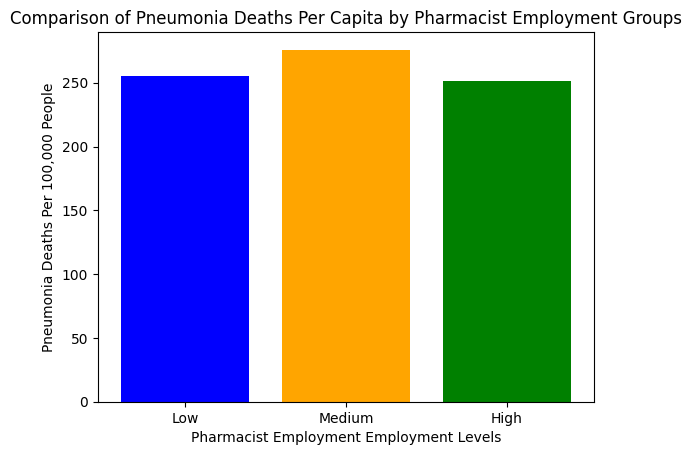

ANOVA Results for Pneumonia Deaths and Physician Assistant Employment:
F-Statistic: 5.021100529922955, P-Value: 0.010560566049754808
--------------------------------------------------


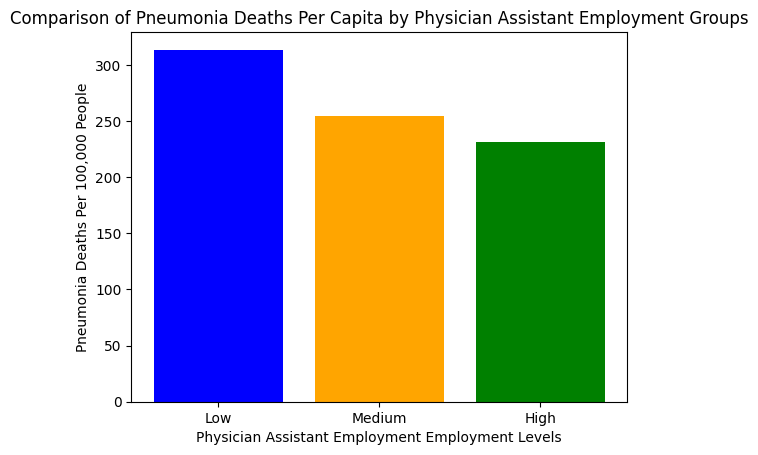

ANOVA Results for Pneumonia Deaths and Internal Medicine Medical Doctor Employment:
F-Statistic: 0.9587909886193877, P-Value: 0.3905752695374832
--------------------------------------------------


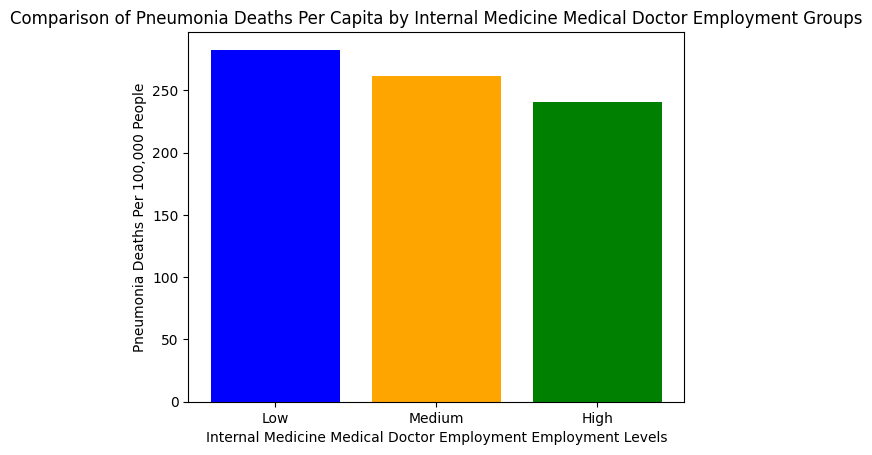

ANOVA Results for Pneumonia Deaths and Family Medicine Medical Doctor Employment:
F-Statistic: 0.9587909886193877, P-Value: 0.3905752695374832
--------------------------------------------------


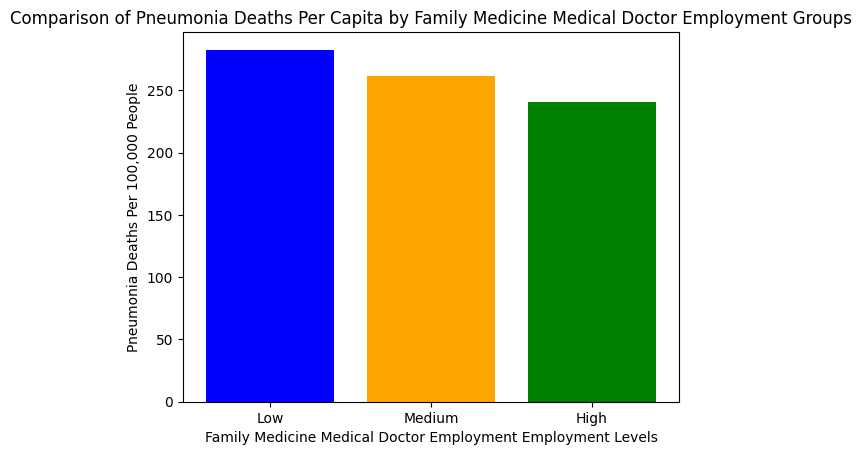

ANOVA Results for Pneumonia Deaths and Emergency Room Medical Doctor Employment:
F-Statistic: 1.5860717205254065, P-Value: 0.2170327883423338
--------------------------------------------------


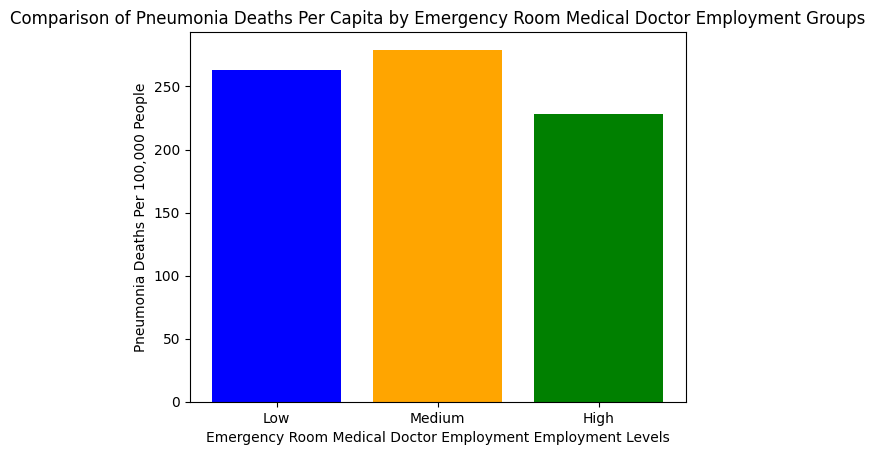

ANOVA Results for Total Deaths and Respiratory Therapist Employment:
F-Statistic: 0.19110171399152215, P-Value: 0.8266739663398512
--------------------------------------------------


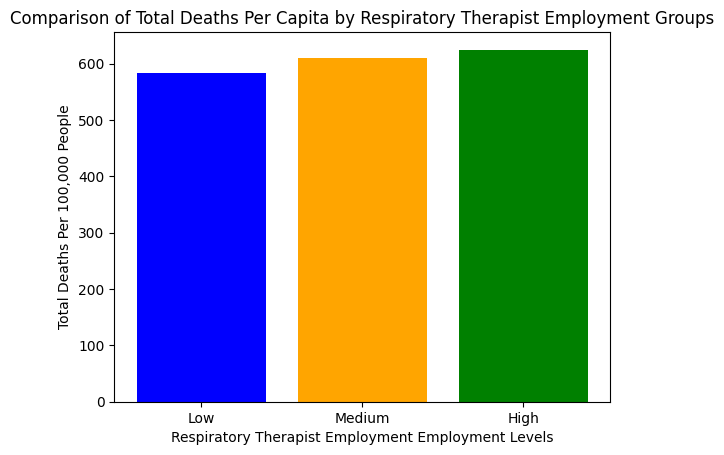

ANOVA Results for Total Deaths and Registered Nurse Employment:
F-Statistic: 0.08200941668514018, P-Value: 0.921392082380405
--------------------------------------------------


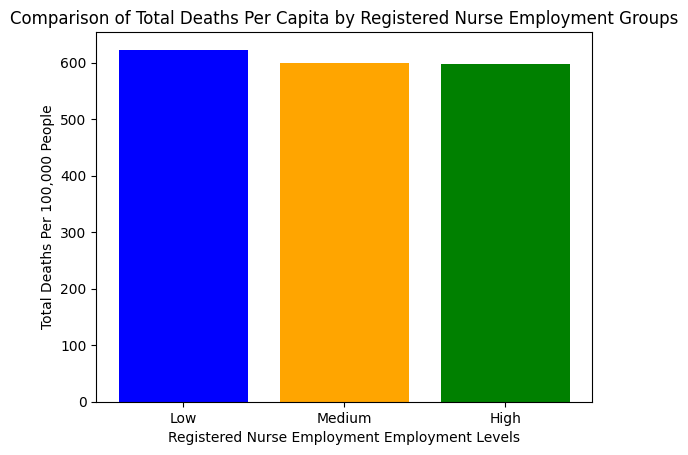

ANOVA Results for Total Deaths and Pharmacist Employment:
F-Statistic: 0.10830912151619355, P-Value: 0.8975688385053131
--------------------------------------------------


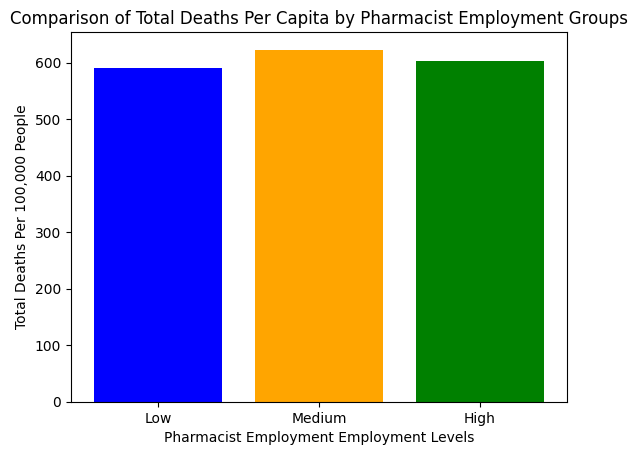

ANOVA Results for Total Deaths and Physician Assistant Employment:
F-Statistic: 3.526214570144761, P-Value: 0.037423300144225354
--------------------------------------------------


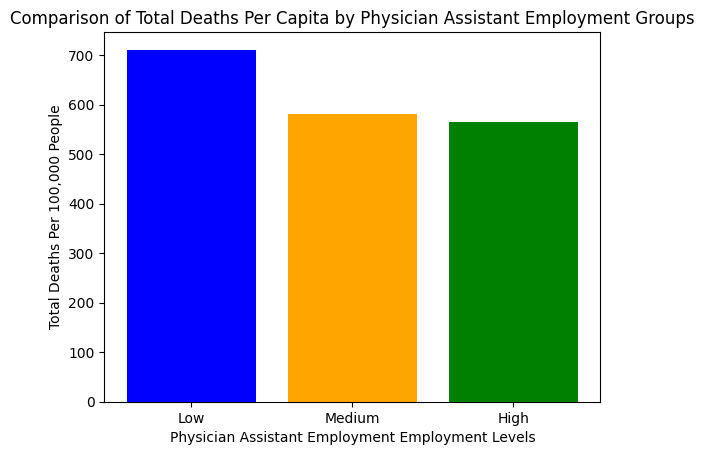

ANOVA Results for Total Deaths and Internal Medicine Medical Doctor Employment:
F-Statistic: 0.6194329635519712, P-Value: 0.5424961954756318
--------------------------------------------------


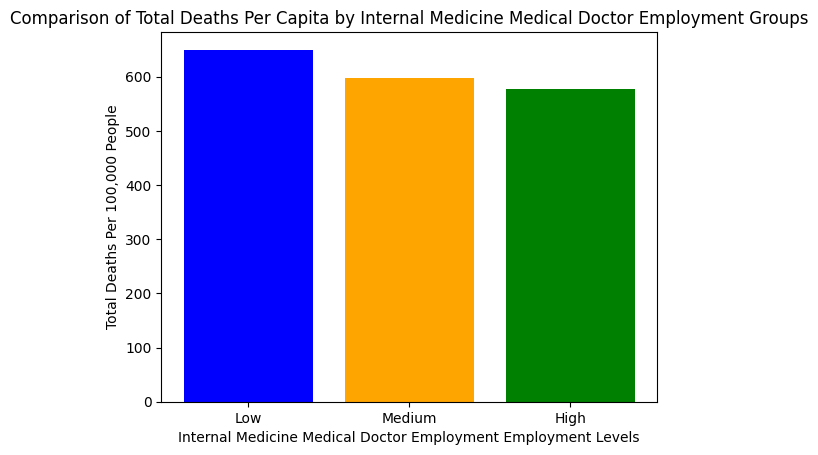

ANOVA Results for Total Deaths and Family Medicine Medical Doctor Employment:
F-Statistic: 0.6194329635519712, P-Value: 0.5424961954756318
--------------------------------------------------


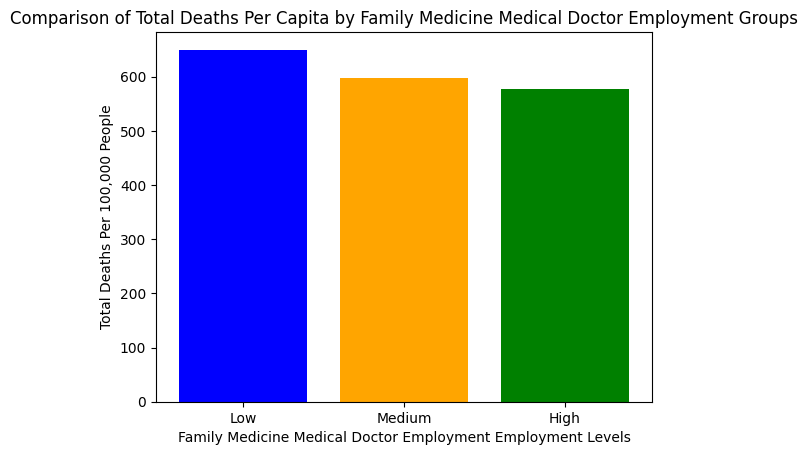

ANOVA Results for Total Deaths and Emergency Room Medical Doctor Employment:
F-Statistic: 0.905182668679626, P-Value: 0.4123973962514269
--------------------------------------------------


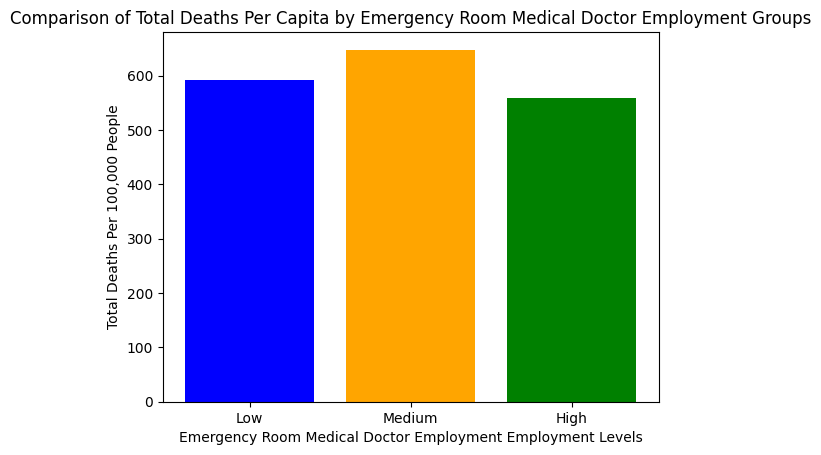

ANOVA Results Summary:
               Condition                                         Role  \
0            COPD Deaths             Respiratory Therapist Employment   
1            COPD Deaths                  Registered Nurse Employment   
2            COPD Deaths                        Pharmacist Employment   
3            COPD Deaths               Physician Assistant Employment   
4            COPD Deaths  Internal Medicine Medical Doctor Employment   
5            COPD Deaths    Family Medicine Medical Doctor Employment   
6            COPD Deaths     Emergency Room Medical Doctor Employment   
7   Heart Failure Deaths             Respiratory Therapist Employment   
8   Heart Failure Deaths                  Registered Nurse Employment   
9   Heart Failure Deaths                        Pharmacist Employment   
10  Heart Failure Deaths               Physician Assistant Employment   
11  Heart Failure Deaths  Internal Medicine Medical Doctor Employment   
12  Heart Failure Deaths    

In [ ]:
#ANOVA by Role

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

# Conditions and roles to analyze
conditions = ['COPD Deaths', 'Heart Failure Deaths', 'Pneumonia Deaths', 'Total Deaths']
roles = [
    'Respiratory Therapist Employment',
    'Registered Nurse Employment',
    'Pharmacist Employment',
    'Physician Assistant Employment',
    'Internal Medicine Medical Doctor Employment',
    'Family Medicine Medical Doctor Employment',
    'Emergency Room Medical Doctor Employment'
]

# Normalize deaths by population for all conditions
for condition in conditions:
    merged_gdf[f'{condition} Per Capita'] = merged_gdf[condition] / merged_gdf['2024'] * 100000

# Function to group states into categories based on role employment
def categorize_states(df, role):
    df[f'{role} Group'] = pd.qcut(df[role], q=3, labels=['Low', 'Medium', 'High'])
    return df

# Store results
anova_results = []

for condition in conditions:
    for role in roles:
        # Categorize states into Low, Medium, High groups based on role employment
        merged_gdf = categorize_states(merged_gdf, role)

        # Perform ANOVA for the condition across the role groups
        low_group = merged_gdf[merged_gdf[f'{role} Group'] == 'Low'][f'{condition} Per Capita'].dropna()
        medium_group = merged_gdf[merged_gdf[f'{role} Group'] == 'Medium'][f'{condition} Per Capita'].dropna()
        high_group = merged_gdf[merged_gdf[f'{role} Group'] == 'High'][f'{condition} Per Capita'].dropna()

        f_stat, p_value = f_oneway(low_group, medium_group, high_group)

        # Store results
        anova_results.append({
            'Condition': condition,
            'Role': role,
            'F-Statistic': f_stat,
            'P-Value': p_value
        })

        # Print results for the current condition and role
        print(f"ANOVA Results for {condition} and {role}:")
        print(f"F-Statistic: {f_stat}, P-Value: {p_value}")
        print("-" * 50)

        # Visualize the comparison
        groups = ['Low', 'Medium', 'High']
        values = [low_group.mean(), medium_group.mean(), high_group.mean()]

        plt.bar(groups, values, color=['blue', 'orange', 'green'])
        plt.title(f'Comparison of {condition} Per Capita by {role} Groups')
        plt.ylabel(f'{condition} Per 100,000 People')
        plt.xlabel(f'{role} Employment Levels')
        plt.show()

# Convert results to DataFrame and save to CSV
anova_results_df = pd.DataFrame(anova_results)
anova_results_df.to_csv('anova_results_by_roles.csv', index=False)

# Print summary of results
print("ANOVA Results Summary:")
print(anova_results_df)


In [ ]:
#ANOVA Table Results

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import os

# Normalize deaths by population for all conditions upfront
conditions = ['COPD Deaths', 'Heart Failure Deaths', 'Pneumonia Deaths', 'Total Deaths']
for condition in conditions:
    merged_gdf[f'{condition} Per Capita'] = merged_gdf[condition] / merged_gdf['2024'] * 100000

# Categorize states into Low, Medium, High groups based on role employment
roles = [
    'Respiratory Therapist Employment',
    'Registered Nurse Employment',
    'Pharmacist Employment',
    'Physician Assistant Employment',
    'Internal Medicine Medical Doctor Employment',
    'Family Medicine Medical Doctor Employment',
    'Emergency Room Medical Doctor Employment'
]

for role in roles:
    merged_gdf[f'{role} Group'] = pd.qcut(merged_gdf[role], q=3, labels=['Low', 'Medium', 'High'])

# Store ANOVA results
anova_results = []
text_outcomes = []  # List to store text outcomes

# Directory to save plots
plot_dir = 'anova_plots'
os.makedirs(plot_dir, exist_ok=True)

for condition in conditions:
    for role in roles:
        # Extract groups
        grouped_data = merged_gdf.groupby(f'{role} Group')[f'{condition} Per Capita']
        groups = [group.dropna() for _, group in grouped_data]

        if len(groups) < 3 or any(len(g) == 0 for g in groups):
            text_outcomes.append(
                f"ANOVA skipped for {condition} and {role} due to insufficient data in one or more groups."
            )
            continue  # Skip if groups are incomplete

        # Perform ANOVA
        f_stat, p_value = f_oneway(*groups)
        group_means = [g.mean() for g in groups]

        # Add to ANOVA results
        anova_results.append({
            'Condition': condition,
            'Role': role,
            'F-Statistic': f_stat,
            'P-Value': p_value,
            'Low Mean': group_means[0],
            'Medium Mean': group_means[1],
            'High Mean': group_means[2],
        })

        # Add to text outcomes
        text_outcomes.append(
            f"ANOVA Results for {condition} and {role}:\n"
            f"  F-Statistic: {f_stat:.2f}\n"
            f"  P-Value: {p_value:.4f}\n"
            f"  Mean Values:\n"
            f"    Low Group: {group_means[0]:.2f}\n"
            f"    Medium Group: {group_means[1]:.2f}\n"
            f"    High Group: {group_means[2]:.2f}\n"
        )

        # Plotting
        plt.bar(['Low', 'Medium', 'High'], group_means, color=['blue', 'orange', 'green'])
        plt.title(f'{condition} Per Capita by {role} Groups')
        plt.ylabel(f'{condition} Per 100,000 People')
        plt.xlabel(f'{role} Employment Levels')
        plt.savefig(os.path.join(plot_dir, f'{condition}_{role}.png'))
        plt.close()

# Save results to CSV
anova_results_df = pd.DataFrame(anova_results)
anova_results_df.to_csv('anova_results_by_roles.csv', index=False)

# Save text outcomes to a text file
with open('anova_outcomes_summary.txt', 'w') as f:
    for outcome in text_outcomes:
        f.write(outcome + "\n")

# Summary output
print("ANOVA Results Summary:")
for outcome in text_outcomes:
    print(outcome)


<ipython-input-15-016b95f4e57d>:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = merged_gdf.groupby(f'{role} Group')[f'{condition} Per Capita']


ANOVA Results Summary:
ANOVA Results for COPD Deaths and Respiratory Therapist Employment:
  F-Statistic: 0.19
  P-Value: 0.8303
  Mean Values:
    Low Group: 80.73
    Medium Group: 87.84
    High Group: 86.70

ANOVA Results for COPD Deaths and Registered Nurse Employment:
  F-Statistic: 0.35
  P-Value: 0.7077
  Mean Values:
    Low Group: 91.19
    Medium Group: 83.31
    High Group: 81.29

ANOVA Results for COPD Deaths and Pharmacist Employment:
  F-Statistic: 0.14
  P-Value: 0.8687
  Mean Values:
    Low Group: 84.29
    Medium Group: 88.72
    High Group: 82.32

ANOVA Results for COPD Deaths and Physician Assistant Employment:
  F-Statistic: 3.30
  P-Value: 0.0456
  Mean Values:
    Low Group: 103.86
    Medium Group: 80.09
    High Group: 76.82

ANOVA Results for COPD Deaths and Internal Medicine Medical Doctor Employment:
  F-Statistic: 1.04
  P-Value: 0.3619
  Mean Values:
    Low Group: 95.49
    Medium Group: 82.10
    High Group: 78.62

ANOVA Results for COPD Deaths and Fami

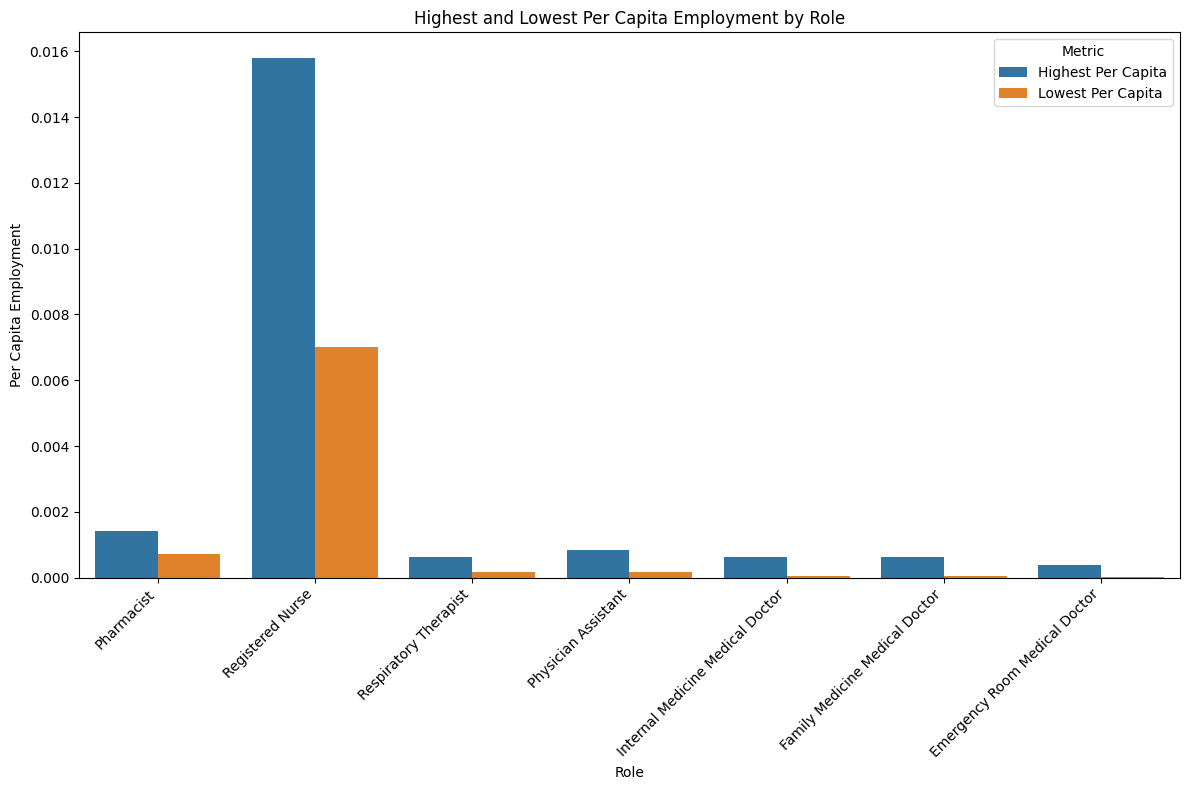

In [ ]:
# Comparison of highest and lowest per capita employment by role

import geopandas as gpd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import us  # For state name conversion

# File paths
state_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/tl_2024_us_state.shp'
population_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/2024_POP.csv'
roles = {
    'Pharmacist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Pharm.csv',
    'Registered Nurse': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RN.csv',
    'Respiratory Therapist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RT.csv',
    'Physician Assistant': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Physcian Assistant.csv',
    'Internal Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Internal.csv',
    'Family Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Family Med Doctors.csv',
    'Emergency Room Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report ER DOC.csv'
}

# Load state shapefile
gdf = gpd.read_file(state_data)

# Load population data
population_df = pd.read_csv(population_data)
population_df['State'] = population_df['State'].str.strip()
population_df['2024'] = pd.to_numeric(population_df['2024'], errors='coerce')
gdf = gdf.rename(columns={'NAME': 'State'})
merged_gdf = gdf.merge(population_df, on='State', how='left')

# Process roles and calculate per capita employment with precision
for role, path in roles.items():
    role_df = pd.read_csv(path)
    role_df['Area Name'] = role_df['Area Name'].str.split('(').str[0].str.strip()
    role_df['Employment'] = pd.to_numeric(role_df['Employment'], errors='coerce')
    role_summary = role_df.groupby('Area Name')['Employment'].sum().reset_index()
    role_summary = role_summary.rename(columns={'Area Name': 'State', 'Employment': f'{role} Employment'})
    merged_gdf = merged_gdf.merge(role_summary, on='State', how='left')
    # Calculate per capita employment with 6 decimal places
    merged_gdf[f'{role} Per Capita'] = (merged_gdf[f'{role} Employment'] / merged_gdf['2024']).round(6)

# Identify states with the highest and lowest per capita employment for each role
role_extremes = []
for role in roles.keys():
    per_capita_col = f'{role} Per Capita'

    # Filter out states with 0 or NaN per capita
    valid_data = merged_gdf[merged_gdf[per_capita_col] > 0]

    if not valid_data.empty:
        highest_state = valid_data.loc[valid_data[per_capita_col].idxmax(), 'State']
        highest_value = valid_data[per_capita_col].max()

        lowest_state = valid_data.loc[valid_data[per_capita_col].idxmin(), 'State']
        lowest_value = valid_data[per_capita_col].min()

        role_extremes.append({
            'Role': role,
            'Highest State': highest_state,
            'Highest Per Capita': highest_value,
            'Lowest State': lowest_state,
            'Lowest Per Capita': lowest_value
        })

# Create a DataFrame for visualization
extreme_df = pd.DataFrame(role_extremes)

# Plot comparison of highest and lowest per capita employment by role
plt.figure(figsize=(12, 8))
sns.barplot(data=extreme_df.melt(id_vars='Role', value_vars=['Highest Per Capita', 'Lowest Per Capita'],
                                 var_name='Metric', value_name='Per Capita Employment'),
            x='Role', y='Per Capita Employment', hue='Metric')
plt.xticks(rotation=45, ha='right')
plt.title('Highest and Lowest Per Capita Employment by Role')
plt.ylabel('Per Capita Employment')
plt.xlabel('Role')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()



Role Summary Table:
+----+----------------------------------+-------------------------------------+----------------------------+---------------+-----------------+----------------------+
|    | Role                             |   Total Employment in United States |   Employment Mean by State |   Hourly Wage |   Annual Salary |   Per Capita by Role |
+====+==================================+=====================================+============================+===============+=================+======================+
|  1 | Registered Nurse                 |                         3.19868e+06 |                   60352.5  |       42.4502 |         88296.4 |             0.009317 |
+----+----------------------------------+-------------------------------------+----------------------------+---------------+-----------------+----------------------+
|  0 | Pharmacist                       |                    334220           |                    6189.26 |       63.3943 |        131860   |       

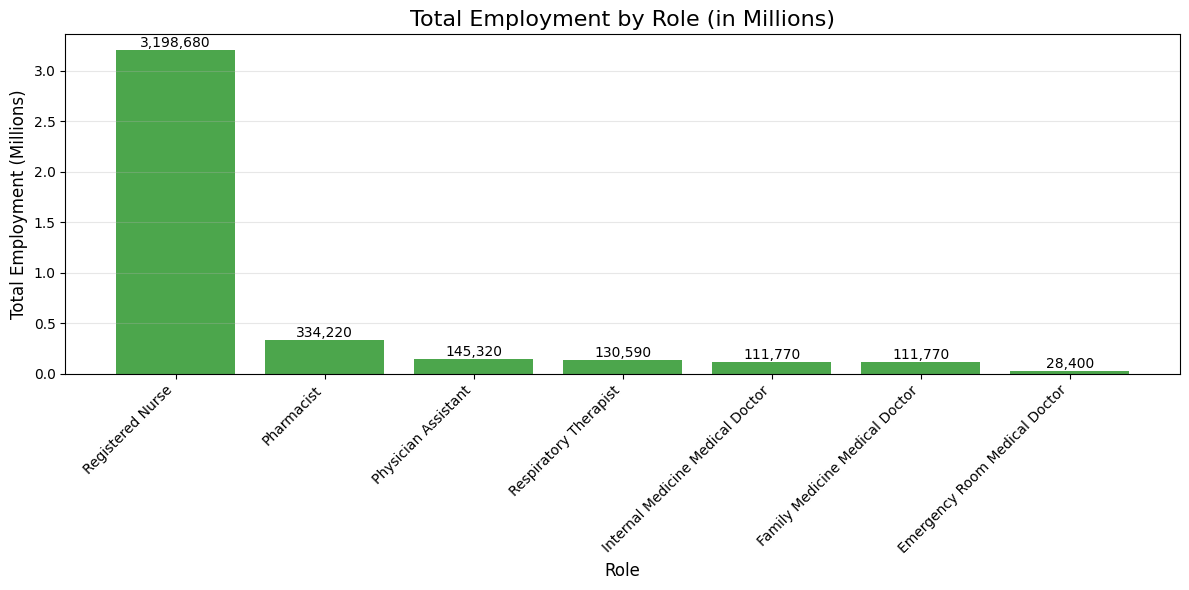


Bar chart for Total Employment has been saved as 'total_employment_by_role_millions.png'.


Role  Total Employment in United States  \
1                  Registered Nurse                          3198680.0   
0                        Pharmacist                           334220.0   
3               Physician Assistant                           145320.0   
2             Respiratory Therapist                           130590.0   
4  Internal Medicine Medical Doctor                           111770.0   
5    Family Medicine Medical Doctor                           111770.0   
6     Emergency Room Medical Doctor                            28400.0   

   Employment Mean by State  Hourly Wage  Annual Salary  Per Capita by Role  
1              60352.452830    42.450189   88296.392453            0.009317  
0               6189.259259    63.394259  131860.059259            0.000974  
3               2849.411765    61.783137  128508.925490            0.000423  
2               2511.346154    36.827115   76600.400000            0.000380  
4               2281.020408   114.150816  237433.697959            0.000326  
5               2281.020408   114.150816  237433.697959            0.000326  
6                979.310345   148.805172  309514.758621            0.000083

from matplotlib import pyplot as plt
summary_df['Total Employment in United States'].plot(kind='hist', bins=20, title='Total Employment in United States')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df['Employment Mean by State'].plot(kind='hist', bins=20, title='Employment Mean by State')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df['Hourly Wage'].plot(kind='hist', bins=20, title='Hourly Wage')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df['Annual Salary'].plot(kind='hist', bins=20, title='Annual Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
summary_df.groupby('Role').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df.plot(kind='scatter', x='Total Employment in United States', y='Employment Mean by State', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df.plot(kind='scatter', x='Employment Mean by State', y='Hourly Wage', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df.plot(kind='scatter', x='Hourly Wage', y='Annual Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df.plot(kind='scatter', x='Annual Salary', y='Per Capita by Role', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
summary_df['Total Employment in United States'].plot(kind='line', figsize=(8, 4), title='Total Employment in United States')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_df['Employment Mean by State'].plot(kind='line', figsize=(8, 4), title='Employment Mean by State')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_df['Hourly Wage'].plot(kind='line', figsize=(8, 4), title='Hourly Wage')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
summary_df['Annual Salary'].plot(kind='line', figsize=(8, 4), title='Annual Salary')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_df['Role'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_df, x='Total Employment in United States', y='Role', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_df['Role'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_df, x='Employment Mean by State', y='Role', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_df['Role'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_df, x='Hourly Wage', y='Role', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(summary_df['Role'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(summary_df, x='Annual Salary', y='Role', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

ERROR:root:Did not find quickchart key chart-57a74e84-45c8-4033-8c13-03a33494c12d in chart cache
ERROR:root:Did not find quickchart key chart-57a74e84-45c8-4033-8c13-03a33494c12d in chart cache
ERROR:root:Did not find quickchart key chart-47b2ce38-5abf-4462-98a3-38b77caaaa0d in chart cache
ERROR:root:Did not find quickchart key chart-47b2ce38-5abf-4462-98a3-38b77caaaa0d in chart cache
ERROR:root:Did not find quickchart key chart-f23aeb88-a9e5-475d-8ac9-367fd877fd14 in chart cache


In [ ]:
# Chart: Total Employment by Roles (in millions) with annotations

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate  # For displaying tables in readable format

# File paths
state_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/tl_2024_us_state.shp'
population_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/2024_POP.csv'
roles = {
    'Pharmacist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Pharm.csv',
    'Registered Nurse': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RN.csv',
    'Respiratory Therapist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RT.csv',
    'Physician Assistant': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Physcian Assistant.csv',
    'Internal Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Internal.csv',
    'Family Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Family Med Doctors.csv',
    'Emergency Room Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report ER DOC.csv'
}

# Load state shapefile
gdf = gpd.read_file(state_data)

# Load population data
population_df = pd.read_csv(population_data)
population_df['State'] = population_df['State'].str.strip()
population_df['2024'] = pd.to_numeric(population_df['2024'], errors='coerce')  # Ensure numeric
gdf = gdf.rename(columns={'NAME': 'State'})
merged_gdf = gdf.merge(population_df, on='State', how='left')

# Initialize list for statistics
role_statistics = []

# Process labor statistics for each role
for role, path in roles.items():
    role_df = pd.read_csv(path)

    # Clean columns
    role_df['Area Name'] = role_df['Area Name'].str.split('(').str[0].str.strip()
    role_df['Employment'] = pd.to_numeric(role_df['Employment'], errors='coerce')
    role_df['Hourly mean wage'] = pd.to_numeric(role_df['Hourly mean wage'], errors='coerce')

    # Drop rows with NaN or zero values
    role_df = role_df.dropna(subset=['Employment', 'Hourly mean wage'])
    role_df = role_df[(role_df['Employment'] > 0) & (role_df['Hourly mean wage'] > 0)]

    # Calculate total employment and wage statistics
    total_employment = role_df['Employment'].sum()
    employment_mean = role_df.groupby('Area Name')['Employment'].mean().mean()
    hourly_wage = role_df['Hourly mean wage'].mean()
    annual_salary = hourly_wage * 40 * 52  # Convert hourly wage to annual salary (40 hours/week, 52 weeks/year)
    per_capita = (total_employment / population_df['2024'].sum()).round(6)

    # Append the summary statistics
    role_statistics.append({
        'Role': role,
        'Total Employment in United States': total_employment,
        'Employment Mean by State': employment_mean,
        'Hourly Wage': hourly_wage,
        'Annual Salary': annual_salary,
        'Per Capita by Role': per_capita
    })

# Convert statistics to DataFrame
summary_df = pd.DataFrame(role_statistics)

# Sort DataFrame by Total Employment in descending order
summary_df = summary_df.sort_values(by='Total Employment in United States', ascending=False)

# Display summary table
print("\nRole Summary Table:")
print(tabulate(summary_df, headers='keys', tablefmt='grid'))

# Save the summary table to a CSV file
summary_df.to_csv('role_summary_table.csv', index=False)
print("\nRole summary table has been saved as 'role_summary_table.csv'.")

# Chart: Total Employment by Roles (in millions) with annotations
plt.figure(figsize=(12, 6))
bars = plt.bar(summary_df['Role'], summary_df['Total Employment in United States'] / 1e6, color='green', alpha=0.7)
plt.title('Total Employment by Role (in Millions)', fontsize=16)
plt.ylabel('Total Employment (Millions)', fontsize=12)
plt.xlabel('Role', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Annotate bars with total employment values
for bar, total in zip(bars, summary_df['Total Employment in United States']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{total:,.0f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('total_employment_by_role_millions.png')
plt.show()

print("\nBar chart for Total Employment has been saved as 'total_employment_by_role_millions.png'.")

# Display summary table as DataFrame
display(summary_df)



Role Summary Table (Sorted by Cost Per Capita):
+----+----------------------------------+-------------------------------------+----------------------------+---------------+-----------------+----------------------+-------------------+
|    | Role                             |   Total Employment in United States |   Employment Mean by State |   Hourly Wage |   Annual Salary |   Per Capita by Role |   Cost Per Capita |
+====+==================================+=====================================+============================+===============+=================+======================+===================+
|  6 | Emergency Room Medical Doctor    |                     28400           |                     979.31 |      148.805  |        309515   |             8.3e-05  |           25.6897 |
+----+----------------------------------+-------------------------------------+----------------------------+---------------+-----------------+----------------------+-------------------+
|  2 | Respiratory Th

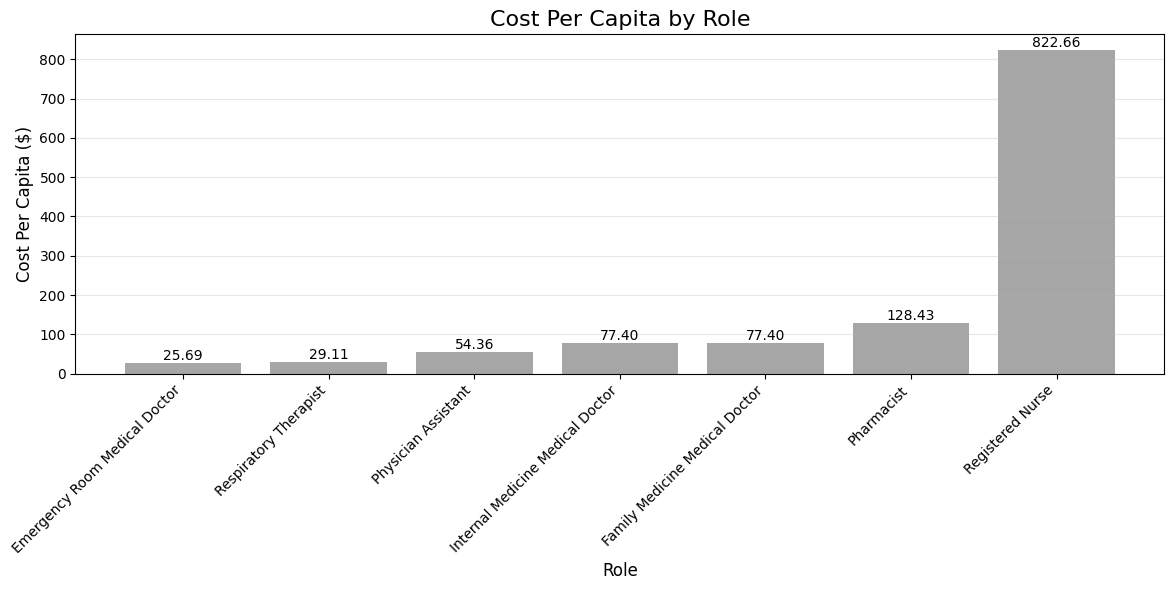


Bar chart for Cost Per Capita has been saved as 'cost_per_capita_by_role_sorted.png'.

Most Cost-Effective Role:
Role                                 Emergency Room Medical Doctor
Total Employment in United States                          28400.0
Employment Mean by State                                979.310345
Hourly Wage                                             148.805172
Annual Salary                                        309514.758621
Per Capita by Role                                        0.000083
Cost Per Capita                                          25.689725
Name: 6, dtype: object


In [ ]:
#Graph Cost of Role per Capita

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate  # For displaying tables in readable format

# File paths
state_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/tl_2024_us_state.shp'
population_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/2024_POP.csv'
roles = {
    'Pharmacist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Pharm.csv',
    'Registered Nurse': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RN.csv',
    'Respiratory Therapist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RT.csv',
    'Physician Assistant': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Physcian Assistant.csv',
    'Internal Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Internal.csv',
    'Family Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Family Med Doctors.csv',
    'Emergency Room Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report ER DOC.csv'
}

# Load state shapefile
gdf = gpd.read_file(state_data)

# Load population data
population_df = pd.read_csv(population_data)
population_df['State'] = population_df['State'].str.strip()
population_df['2024'] = pd.to_numeric(population_df['2024'], errors='coerce')  # Ensure numeric
gdf = gdf.rename(columns={'NAME': 'State'})
merged_gdf = gdf.merge(population_df, on='State', how='left')

# Initialize list for statistics
role_statistics = []

# Process labor statistics for each role
for role, path in roles.items():
    role_df = pd.read_csv(path)

    # Clean columns
    role_df['Area Name'] = role_df['Area Name'].str.split('(').str[0].str.strip()
    role_df['Employment'] = pd.to_numeric(role_df['Employment'], errors='coerce')
    role_df['Hourly mean wage'] = pd.to_numeric(role_df['Hourly mean wage'], errors='coerce')

    # Drop rows with NaN or zero values
    role_df = role_df.dropna(subset=['Employment', 'Hourly mean wage'])
    role_df = role_df[(role_df['Employment'] > 0) & (role_df['Hourly mean wage'] > 0)]

    # Calculate total employment and wage statistics
    total_employment = role_df['Employment'].sum()
    employment_mean = role_df.groupby('Area Name')['Employment'].mean().mean()
    hourly_wage = role_df['Hourly mean wage'].mean()
    annual_salary = hourly_wage * 40 * 52  # Convert hourly wage to annual salary (40 hours/week, 52 weeks/year)
    per_capita = (total_employment / population_df['2024'].sum()).round(6)
    cost_per_capita = annual_salary * per_capita

    # Append the summary statistics
    role_statistics.append({
        'Role': role,
        'Total Employment in United States': total_employment,
        'Employment Mean by State': employment_mean,
        'Hourly Wage': hourly_wage,
        'Annual Salary': annual_salary,
        'Per Capita by Role': per_capita,
        'Cost Per Capita': cost_per_capita
    })

# Convert statistics to DataFrame
summary_df = pd.DataFrame(role_statistics)

# Sort DataFrame by Cost Per Capita in ascending order to find the most cost-effective role
summary_df = summary_df.sort_values(by='Cost Per Capita', ascending=True)

# Display summary table
print("\nRole Summary Table (Sorted by Cost Per Capita):")
print(tabulate(summary_df, headers='keys', tablefmt='grid'))

# Save the summary table to a CSV file
summary_df.to_csv('role_summary_table_sorted.csv', index=False)
print("\nRole summary table has been saved as 'role_summary_table_sorted.csv'.")

# Chart: Cost Per Capita by Role
plt.figure(figsize=(12, 6))
bars = plt.bar(summary_df['Role'], summary_df['Cost Per Capita'], color='grey', alpha=0.7)
plt.title('Cost Per Capita by Role', fontsize=16)
plt.ylabel('Cost Per Capita ($)', fontsize=12)
plt.xlabel('Role', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Annotate bars with cost per capita values
for bar, cost in zip(bars, summary_df['Cost Per Capita']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{cost:,.2f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('cost_per_capita_by_role_sorted.png')
plt.show()

print("\nBar chart for Cost Per Capita has been saved as 'cost_per_capita_by_role_sorted.png'.")

# Display most cost-effective role
most_cost_effective = summary_df.iloc[0]
print("\nMost Cost-Effective Role:")
print(most_cost_effective)



Role Summary Table (Sorted by Hourly Wage):
+----+----------------------------------+-------------------------------------+----------------------------+---------------+-----------------+----------------------+
|    | Role                             |   Total Employment in United States |   Employment Mean by State |   Hourly Wage |   Annual Salary |   Per Capita by Role |
+====+==================================+=====================================+============================+===============+=================+======================+
|  6 | Emergency Room Medical Doctor    |                     28400           |                     979.31 |      148.805  |        309515   |             8.3e-05  |
+----+----------------------------------+-------------------------------------+----------------------------+---------------+-----------------+----------------------+
|  4 | Internal Medicine Medical Doctor |                    111770           |                    2281.02 |      114.151  | 

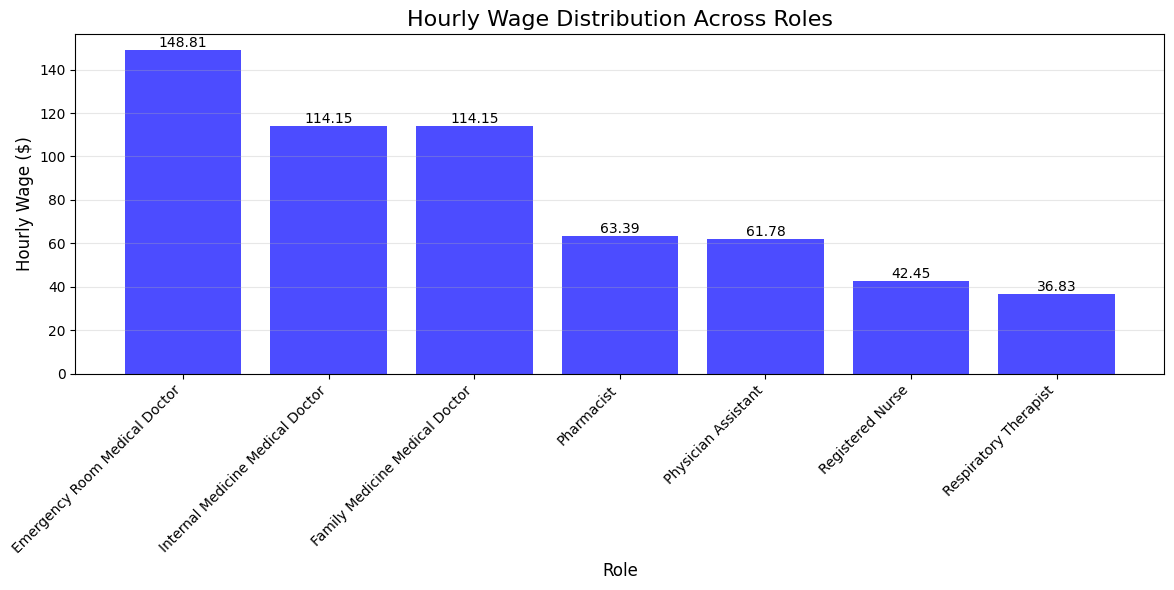


Bar chart for Hourly Wage Distribution has been saved as 'hourly_wage_distribution_sorted.png'.


Role  Total Employment in United States  \
6     Emergency Room Medical Doctor                            28400.0   
4  Internal Medicine Medical Doctor                           111770.0   
5    Family Medicine Medical Doctor                           111770.0   
0                        Pharmacist                           334220.0   
3               Physician Assistant                           145320.0   
1                  Registered Nurse                          3198680.0   
2             Respiratory Therapist                           130590.0   

   Employment Mean by State  Hourly Wage  Annual Salary  Per Capita by Role  
6                979.310345   148.805172  309514.758621            0.000083  
4               2281.020408   114.150816  237433.697959            0.000326  
5               2281.020408   114.150816  237433.697959            0.000326  
0               6189.259259    63.394259  131860.059259            0.000974  
3               2849.411765    61.783137  128508.925490            0.000423  
1              60352.452830    42.450189   88296.392453            0.009317  
2               2511.346154    36.827115   76600.400000            0.000380

In [ ]:
# Chart: Hourly Wage Distribution Across Roles (Sorted)

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate  # For displaying tables in readable format

# File paths
state_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/tl_2024_us_state.shp'
population_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/2024_POP.csv'
roles = {
    'Pharmacist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Pharm.csv',
    'Registered Nurse': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RN.csv',
    'Respiratory Therapist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RT.csv',
    'Physician Assistant': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Physcian Assistant.csv',
    'Internal Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Internal.csv',
    'Family Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Family Med Doctors.csv',
    'Emergency Room Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report ER DOC.csv'
}

# Load state shapefile
gdf = gpd.read_file(state_data)

# Load population data
population_df = pd.read_csv(population_data)
population_df['State'] = population_df['State'].str.strip()
population_df['2024'] = pd.to_numeric(population_df['2024'], errors='coerce')  # Ensure numeric
gdf = gdf.rename(columns={'NAME': 'State'})
merged_gdf = gdf.merge(population_df, on='State', how='left')

# Initialize list for statistics
role_statistics = []

# Process labor statistics for each role
for role, path in roles.items():
    role_df = pd.read_csv(path)

    # Clean columns
    role_df['Area Name'] = role_df['Area Name'].str.split('(').str[0].str.strip()
    role_df['Employment'] = pd.to_numeric(role_df['Employment'], errors='coerce')
    role_df['Hourly mean wage'] = pd.to_numeric(role_df['Hourly mean wage'], errors='coerce')

    # Drop rows with NaN or zero values
    role_df = role_df.dropna(subset=['Employment', 'Hourly mean wage'])
    role_df = role_df[(role_df['Employment'] > 0) & (role_df['Hourly mean wage'] > 0)]

    # Calculate total employment and wage statistics
    total_employment = role_df['Employment'].sum()
    employment_mean = role_df.groupby('Area Name')['Employment'].mean().mean()
    hourly_wage = role_df['Hourly mean wage'].mean()
    annual_salary = hourly_wage * 40 * 52  # Convert hourly wage to annual salary (40 hours/week, 52 weeks/year)
    per_capita = (total_employment / population_df['2024'].sum()).round(6)

    # Append the summary statistics
    role_statistics.append({
        'Role': role,
        'Total Employment in United States': total_employment,
        'Employment Mean by State': employment_mean,
        'Hourly Wage': hourly_wage,
        'Annual Salary': annual_salary,
        'Per Capita by Role': per_capita
    })

# Convert statistics to DataFrame
summary_df = pd.DataFrame(role_statistics)

# Sort DataFrame by Hourly Wage in descending order
summary_df = summary_df.sort_values(by='Hourly Wage', ascending=False)

# Display summary table
print("\nRole Summary Table (Sorted by Hourly Wage):")
print(tabulate(summary_df, headers='keys', tablefmt='grid'))

# Save the summary table to a CSV file
summary_df.to_csv('role_summary_table_sorted_by_hourly_wage.csv', index=False)
print("\nRole summary table has been saved as 'role_summary_table_sorted_by_hourly_wage.csv'.")

# Chart: Hourly Wage Distribution Across Roles (Sorted)
plt.figure(figsize=(12, 6))
bars = plt.bar(summary_df['Role'], summary_df['Hourly Wage'], color='blue', alpha=0.7)
plt.title('Hourly Wage Distribution Across Roles', fontsize=16)
plt.ylabel('Hourly Wage ($)', fontsize=12)
plt.xlabel('Role', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Annotate bars with wage values
for bar, wage in zip(bars, summary_df['Hourly Wage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{wage:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('hourly_wage_distribution_sorted.png')
plt.show()

print("\nBar chart for Hourly Wage Distribution has been saved as 'hourly_wage_distribution_sorted.png'.")

# Display summary table as DataFrame
display(summary_df)



Annual Spending by Role (Sorted):
+----+----------------------------------+-------------------+
|    | Role                             |   Annual Spending |
+====+==================================+===================+
|  1 | Registered Nurse                 |       2.82432e+11 |
+----+----------------------------------+-------------------+
|  0 | Pharmacist                       |       4.40703e+10 |
+----+----------------------------------+-------------------+
|  4 | Internal Medicine Medical Doctor |       2.6538e+10  |
+----+----------------------------------+-------------------+
|  5 | Family Medicine Medical Doctor   |       2.6538e+10  |
+----+----------------------------------+-------------------+
|  3 | Physician Assistant              |       1.86749e+10 |
+----+----------------------------------+-------------------+
|  2 | Respiratory Therapist            |       1.00032e+10 |
+----+----------------------------------+-------------------+
|  6 | Emergency Room Medical Docto

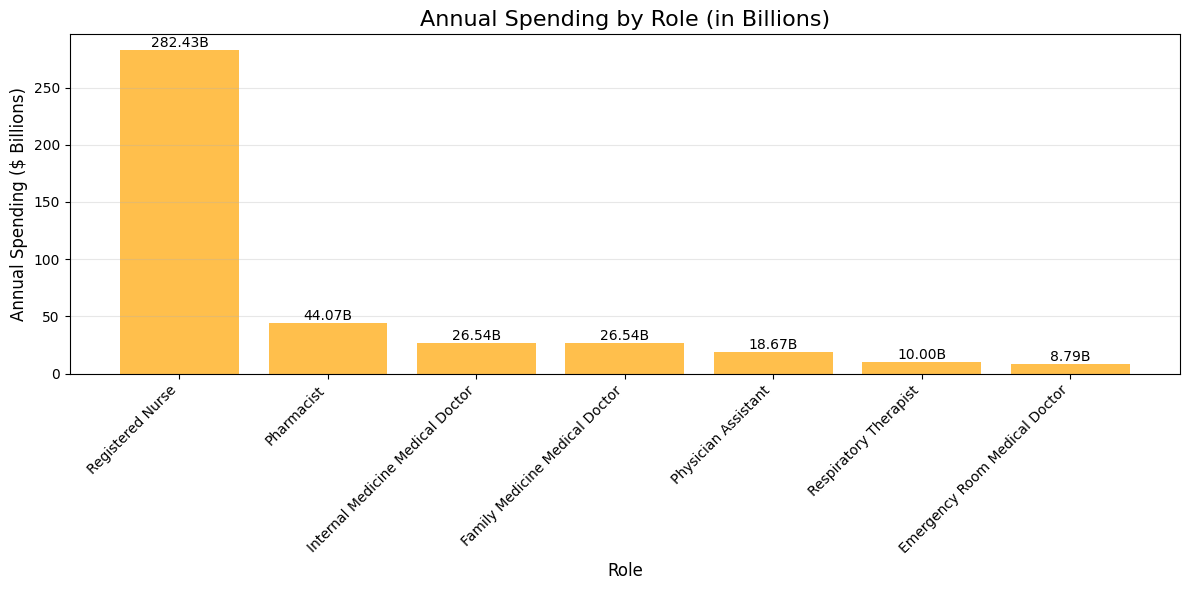


Bar chart for Annual Spending by Role has been saved as 'annual_spending_by_role_sorted.png'.


In [ ]:
# Chart: Annual Spending by Role


import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate  # For displaying tables in readable format

# File paths
state_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/tl_2024_us_state.shp'
population_data = '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/2024_us_state/2024_POP.csv'
roles = {
    'Pharmacist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Pharm.csv',
    'Registered Nurse': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RN.csv',
    'Respiratory Therapist': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report RT.csv',
    'Physician Assistant': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Physcian Assistant.csv',
    'Internal Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Internal.csv',
    'Family Medicine Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report Family Med Doctors.csv',
    'Emergency Room Medical Doctor': '/content/drive/MyDrive/Final Research Project/FinalPaper_Medical_Errors_by_Staff/Hospital_Roles/OES_Report ER DOC.csv'
}

# Initialize list for statistics
role_statistics = []

# Process labor statistics for each role
for role, path in roles.items():
    role_df = pd.read_csv(path)

    # Clean columns
    role_df['Area Name'] = role_df['Area Name'].str.split('(').str[0].str.strip()
    role_df['Employment'] = pd.to_numeric(role_df['Employment'], errors='coerce')
    role_df['Hourly mean wage'] = pd.to_numeric(role_df['Hourly mean wage'], errors='coerce')

    # Drop rows with NaN or zero values
    role_df = role_df.dropna(subset=['Employment', 'Hourly mean wage'])
    role_df = role_df[(role_df['Employment'] > 0) & (role_df['Hourly mean wage'] > 0)]

    # Calculate total employment and annual spending
    total_employment = role_df['Employment'].sum()
    annual_salary = role_df['Hourly mean wage'].mean() * 40 * 52  # Convert hourly wage to annual salary
    annual_spending = total_employment * annual_salary  # Total annual spending for the role

    # Append the summary statistics
    role_statistics.append({
        'Role': role,
        'Annual Spending': annual_spending
    })

# Convert statistics to DataFrame
summary_df = pd.DataFrame(role_statistics)

# Sort DataFrame by Annual Spending in descending order
summary_df = summary_df.sort_values(by='Annual Spending', ascending=False)

# Display summary table
print("\nAnnual Spending by Role (Sorted):")
print(tabulate(summary_df, headers='keys', tablefmt='grid'))

# Save the summary table to a CSV file
summary_df.to_csv('annual_spending_by_role.csv', index=False)
print("\nAnnual spending table has been saved as 'annual_spending_by_role.csv'.")

# Chart: Annual Spending by Role
plt.figure(figsize=(12, 6))
bars = plt.bar(summary_df['Role'], summary_df['Annual Spending'] / 1e9, color='orange', alpha=0.7)
plt.title('Annual Spending by Role (in Billions)', fontsize=16)
plt.ylabel('Annual Spending ($ Billions)', fontsize=12)
plt.xlabel('Role', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Annotate bars with annual spending values
for bar, spending in zip(bars, summary_df['Annual Spending']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{spending / 1e9:.2f}B',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('annual_spending_by_role_sorted.png')
plt.show()

print("\nBar chart for Annual Spending by Role has been saved as 'annual_spending_by_role_sorted.png'.")


In [ ]:
#Multivariate Analysis

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA

# Conditions and roles to analyze
conditions = ['COPD Deaths', 'Heart Failure Deaths', 'Pneumonia Deaths', 'Total Deaths']
roles = [
    'Respiratory Therapist Employment',
    'Registered Nurse Employment',
    'Pharmacist Employment',
    'Physician Assistant Employment',
    'Internal Medicine Medical Doctor Employment',
    'Family Medicine Medical Doctor Employment',
    'Emergency Room Medical Doctor Employment'
]

# Normalize deaths by population for all conditions
for condition in conditions:
    merged_gdf[f'{condition} Per Capita'] = merged_gdf[condition] / merged_gdf['2024'] * 100000

# Sanitize column names to remove spaces and special characters
sanitized_columns = {col: col.replace(" ", "_").replace("/", "_") for col in merged_gdf.columns}
merged_gdf.rename(columns=sanitized_columns, inplace=True)

# Update conditions and roles to sanitized versions
conditions_sanitized = [col.replace(" ", "_").replace("/", "_") for col in conditions]
roles_sanitized = [col.replace(" ", "_").replace("/", "_") for col in roles]
dependent_vars = [f'{condition}_Per_Capita' for condition in conditions_sanitized]
independent_vars = roles_sanitized

# Drop missing values to ensure compatibility
manova_data = merged_gdf[dependent_vars + independent_vars].dropna()

# Check for collinearity
correlation_matrix = manova_data[independent_vars].corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Drop highly correlated variables if necessary (manual or programmatic approach)
# Example: If two variables have a correlation > 0.9, drop one
threshold = 0.9
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            to_drop.add(correlation_matrix.columns[i])
independent_vars = [var for var in independent_vars if var not in to_drop]

print("Reduced Independent Variables:")
print(independent_vars)

# Fit the MANOVA model with reduced independent variables
formula = f"{' + '.join(dependent_vars)} ~ {' + '.join(independent_vars)}"
manova_model = MANOVA.from_formula(formula, data=manova_data)
manova_results = manova_model.mv_test()

# Print MANOVA results
print("MANOVA Results:")
print(manova_results)

# Save results to a text file
with open('manova_results.txt', 'w') as f:
    f.write(str(manova_results))
